### Cargamos las librerias necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact 

## Cargamos los datos

In [2]:
url_nuevos   = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto13/CasosNuevosCumulativo_T.csv"
data_nuevos  = pd.read_csv(url_nuevos)
data_nuevos = data_nuevos.rename(columns = {'Region':'Fecha'})
data_nuevos.tail(5)

,Fecha,Arica y Parinacota,Tarapacá,Antofagasta,Atacama,Coquimbo,Valparaíso,Metropolitana,O’Higgins,Maule,Ñuble,Biobío,Araucanía,Los Ríos,Los Lagos,Aysén,Magallanes,Total
96,2020-06-07,31,156,121,25,92,282,5268,72,140,20,105,56,17,18,1,1,6405
97,2020-06-08,24,142,91,33,133,287,3674,72,67,62,56,33,8,7,1,6,4696
98,2020-06-09,40,99,157,9,52,242,2990,62,113,32,43,35,21,18,0,0,3913
99,2020-06-10,16,100,157,17,81,223,4620,125,151,32,152,43,6,13,0,1,5737
100,2020-06-11,37,105,194,24,89,251,4389,110,120,57,128,47,10,21,1,13,5596


In [3]:
url_acumulados  = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto3/CasosTotalesCumulativo_T.csv"
data_acumulados = pd.read_csv(url_acumulados)
data_acumulados = data_acumulados.rename(columns = {'Region':'Fecha'})
data_acumulados.tail(5)

,Fecha,Arica y Parinacota,Tarapacá,Antofagasta,Atacama,Coquimbo,Valparaíso,Metropolitana,O’Higgins,Maule,Ñuble,Biobío,Araucanía,Los Ríos,Los Lagos,Aysén,Magallanes,Total
96,2020-06-07,850,3250,3154,306,990,4862,108462,1183,2109,1490,2595,2377,417,1003,20,1082,134150
97,2020-06-08,874,3392,3245,339,1123,5149,112136,1255,2176,1552,2651,2410,425,1010,21,1088,138846
98,2020-06-09,914,3491,3402,348,1175,5391,115126,1317,2289,1584,2694,2445,446,1028,21,1088,142759
99,2020-06-10,930,3591,3559,365,1256,5614,119746,1442,2440,1616,2846,2488,452,1041,21,1089,148496
100,2020-06-11,967,3696,3753,389,1345,5865,124135,1552,2560,1673,2974,2535,462,1062,22,1102,154092


## Nuevos contagios por día vs contagios totales

In [4]:
def graph(region):
    fechas        = data_nuevos["Fecha"].values.tolist()
    casos_nuevos  = data_nuevos[region].values.tolist()
    casos_totales = data_acumulados[region].values.tolist()
    
    plt.figure(figsize=(20,15))
    plt.plot(casos_totales, casos_nuevos, 'bo-')
    plt.title("Region: " + region)
    plt.grid()
    plt.xlabel('Casos totales')
    plt.ylabel('Casos nuevos')
    #plt.xscale('log')
    #plt.yscale('log')
    plt.show()

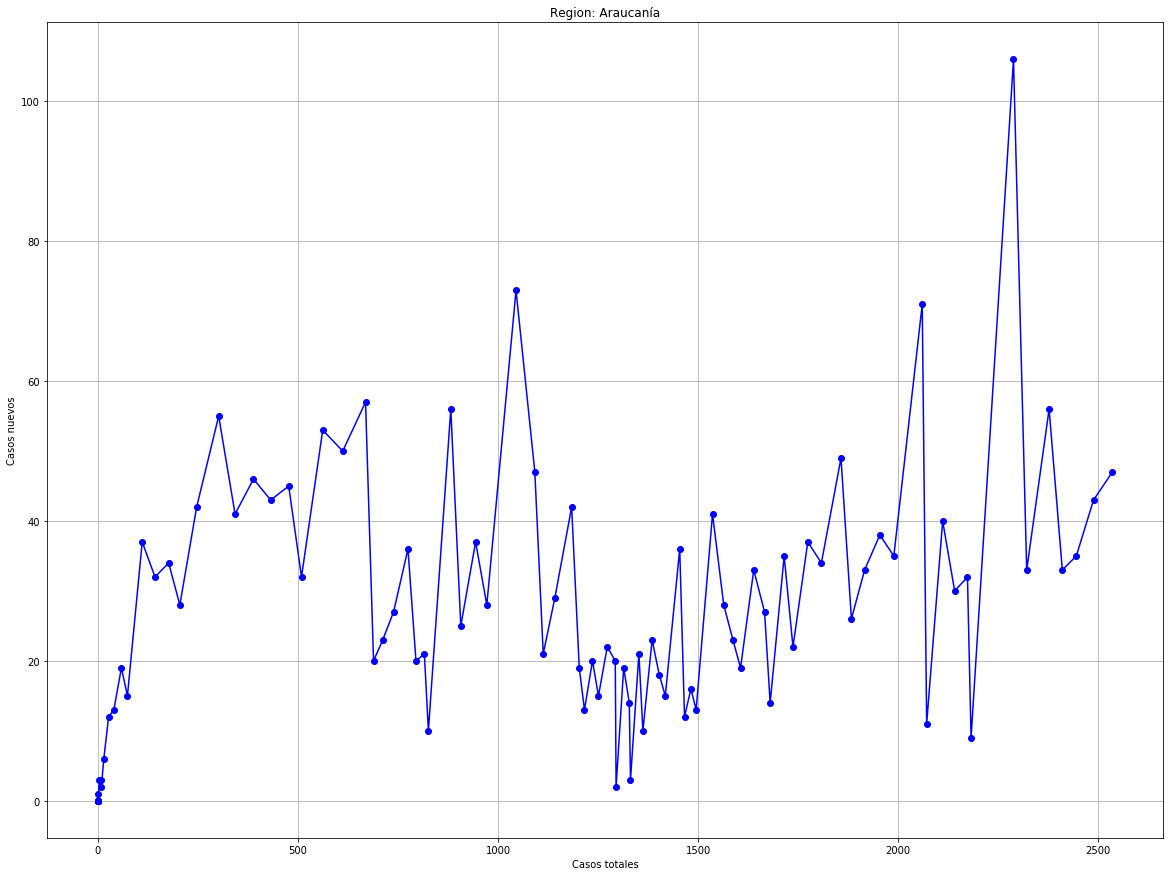

In [5]:
graph("Araucanía")

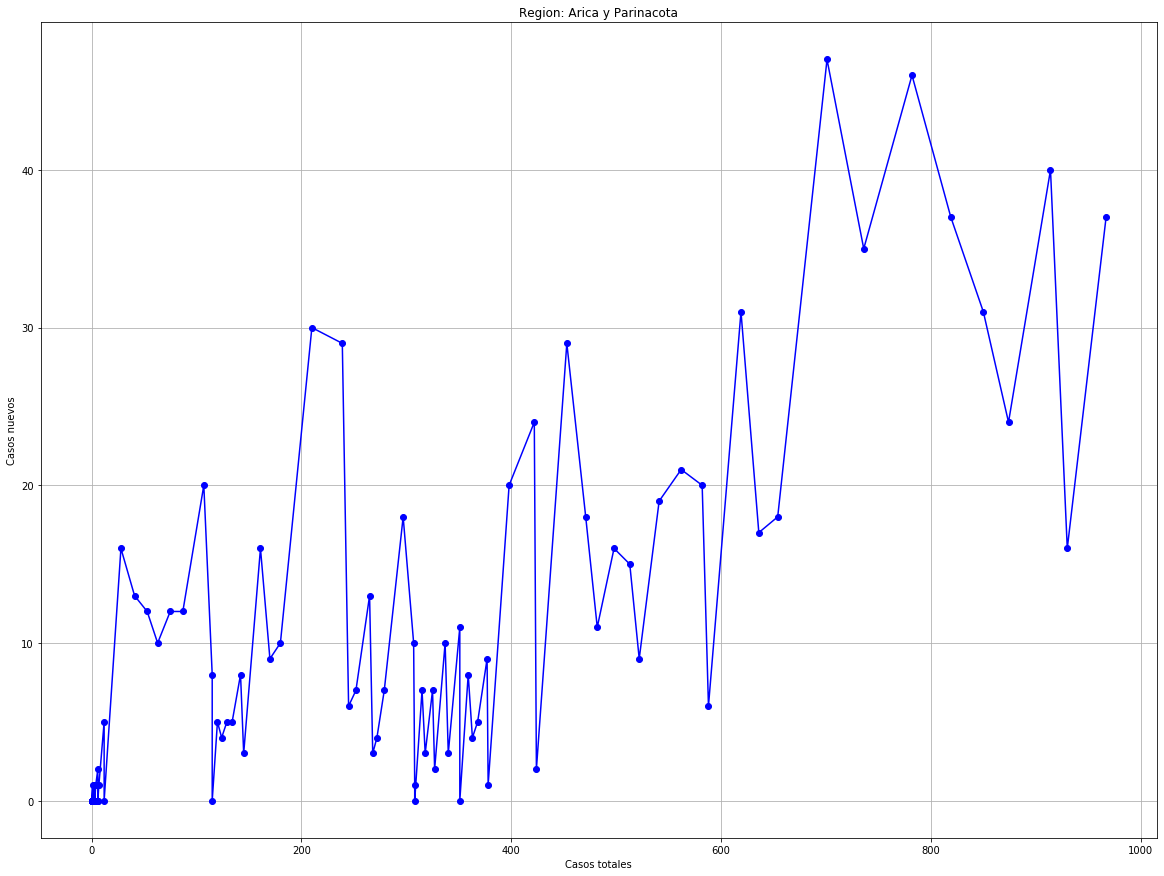

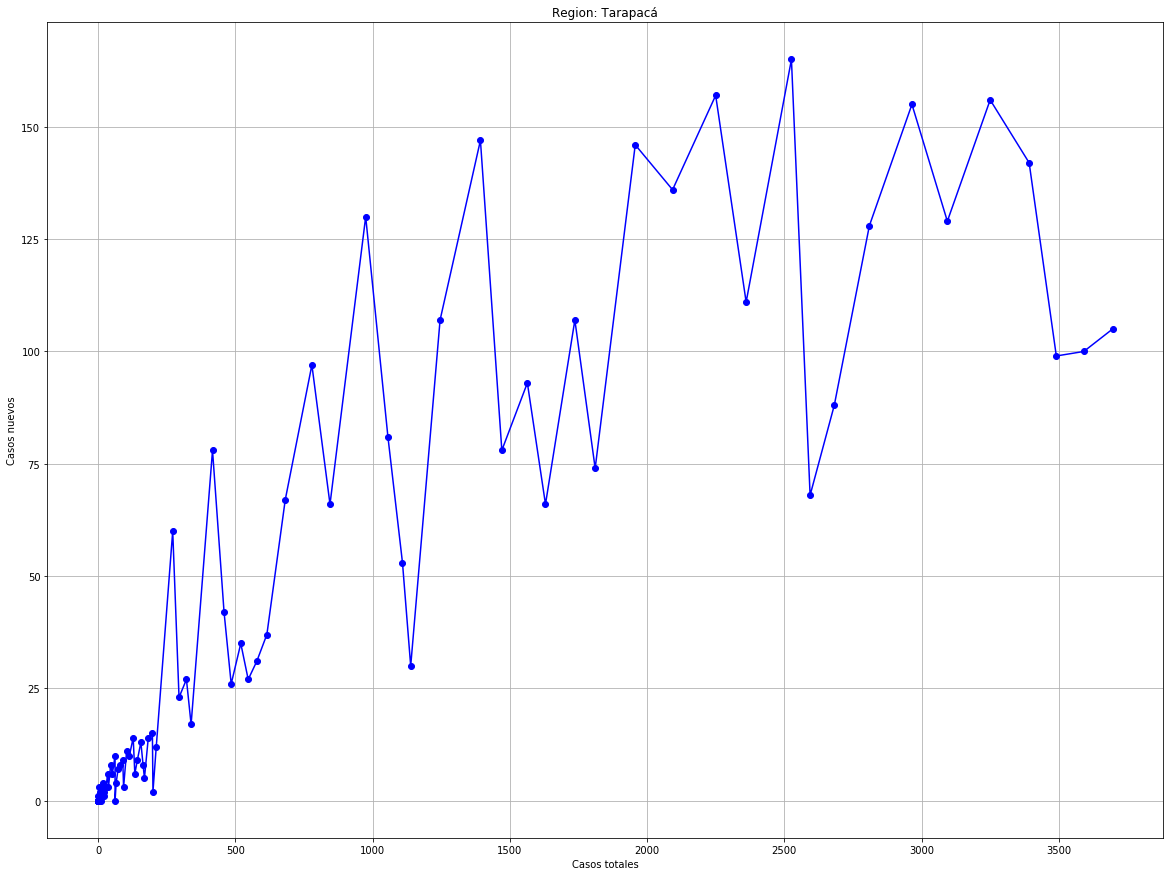

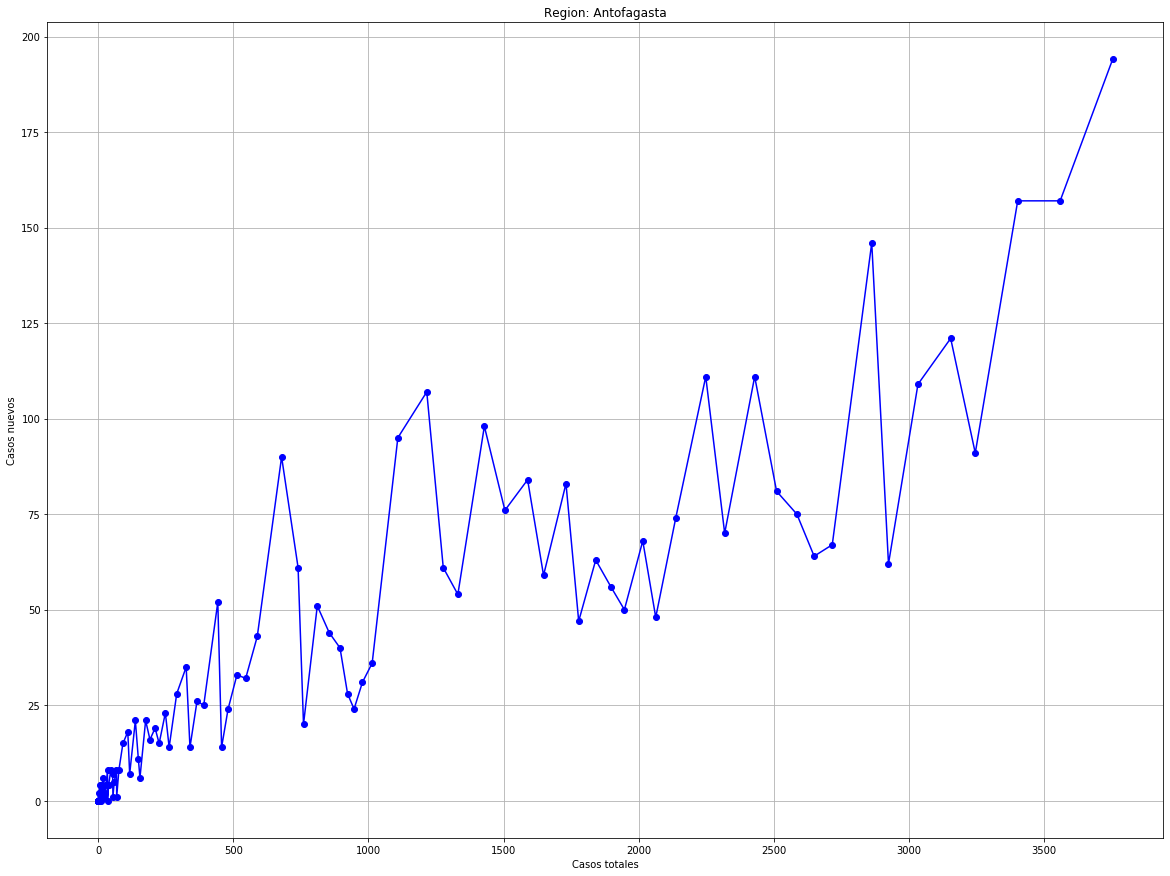

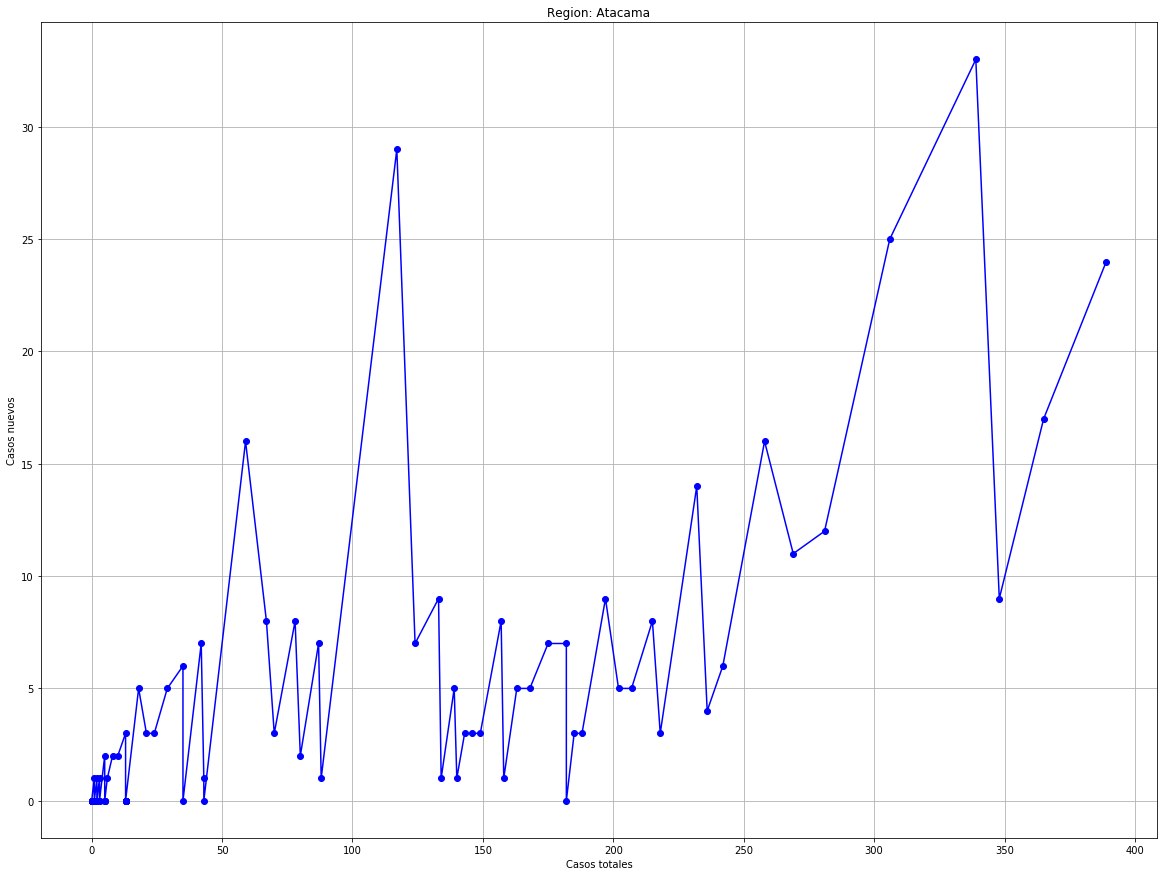

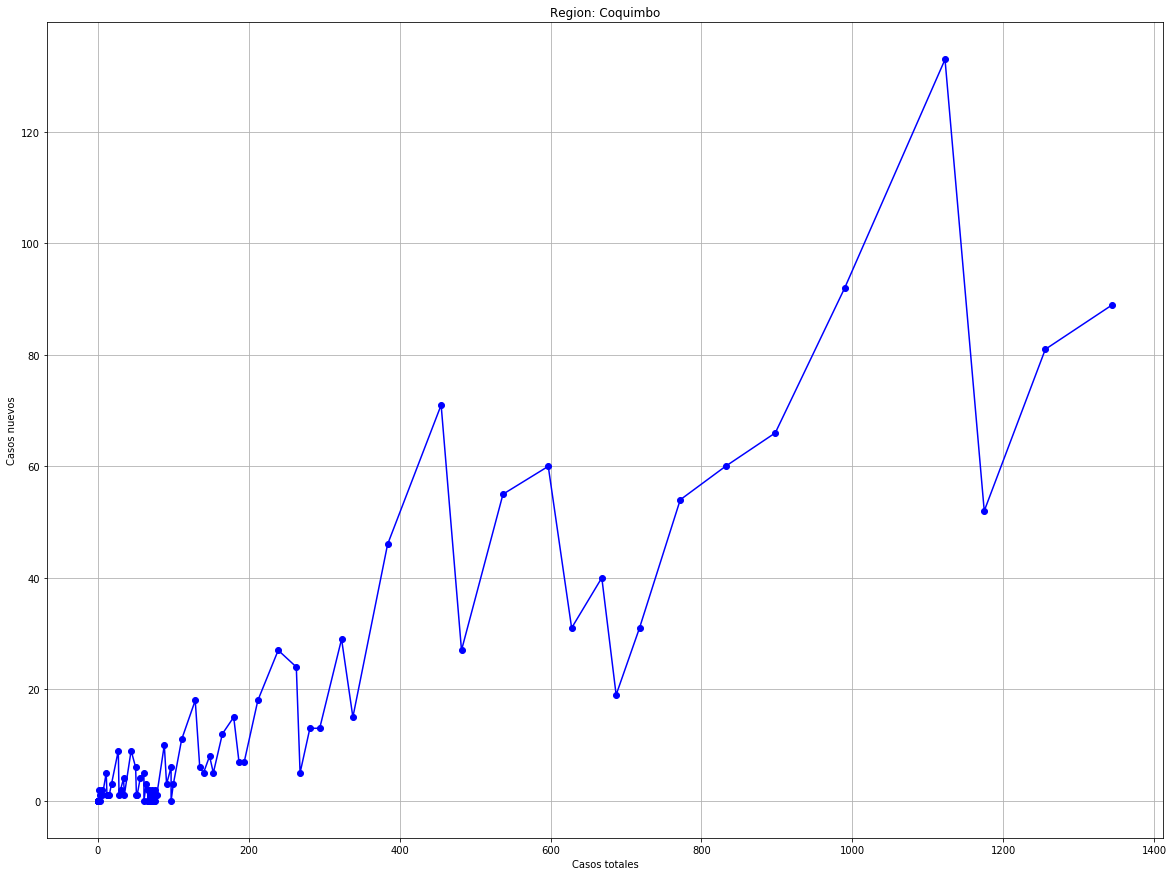

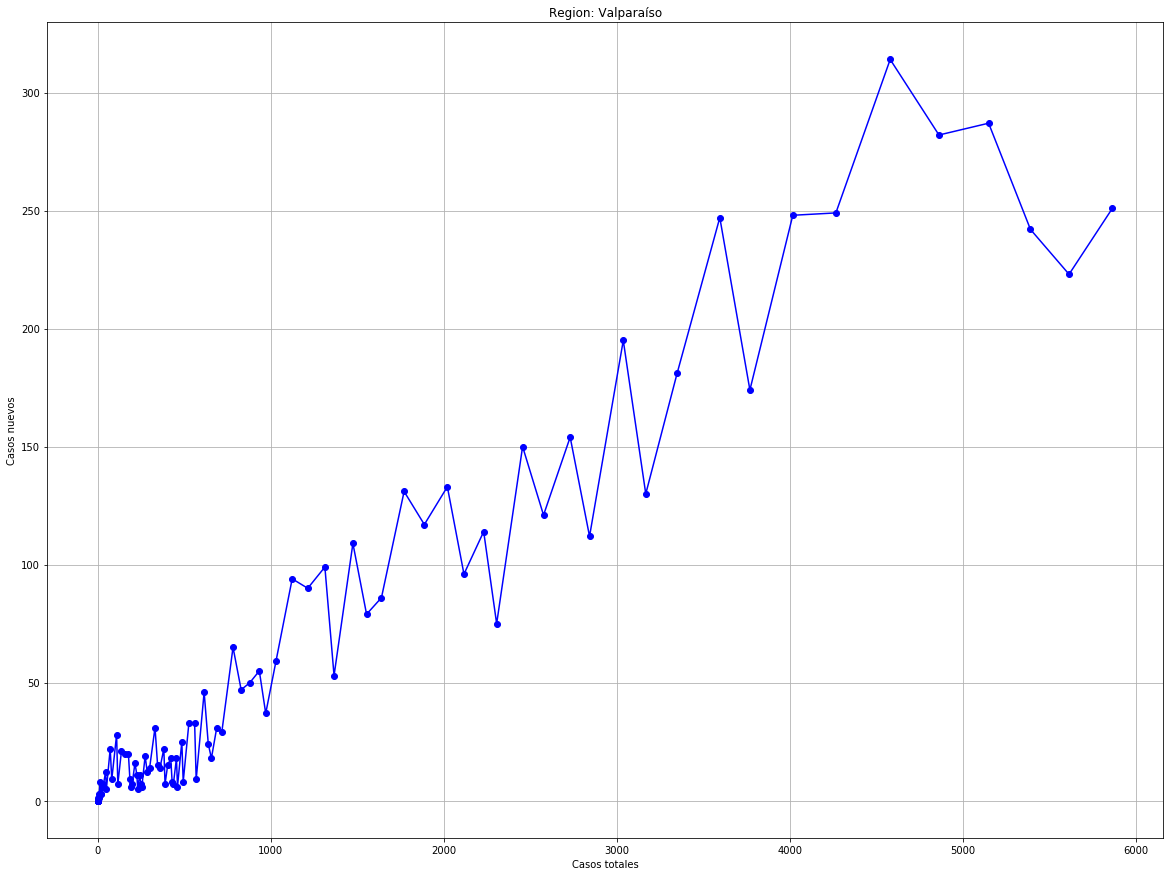

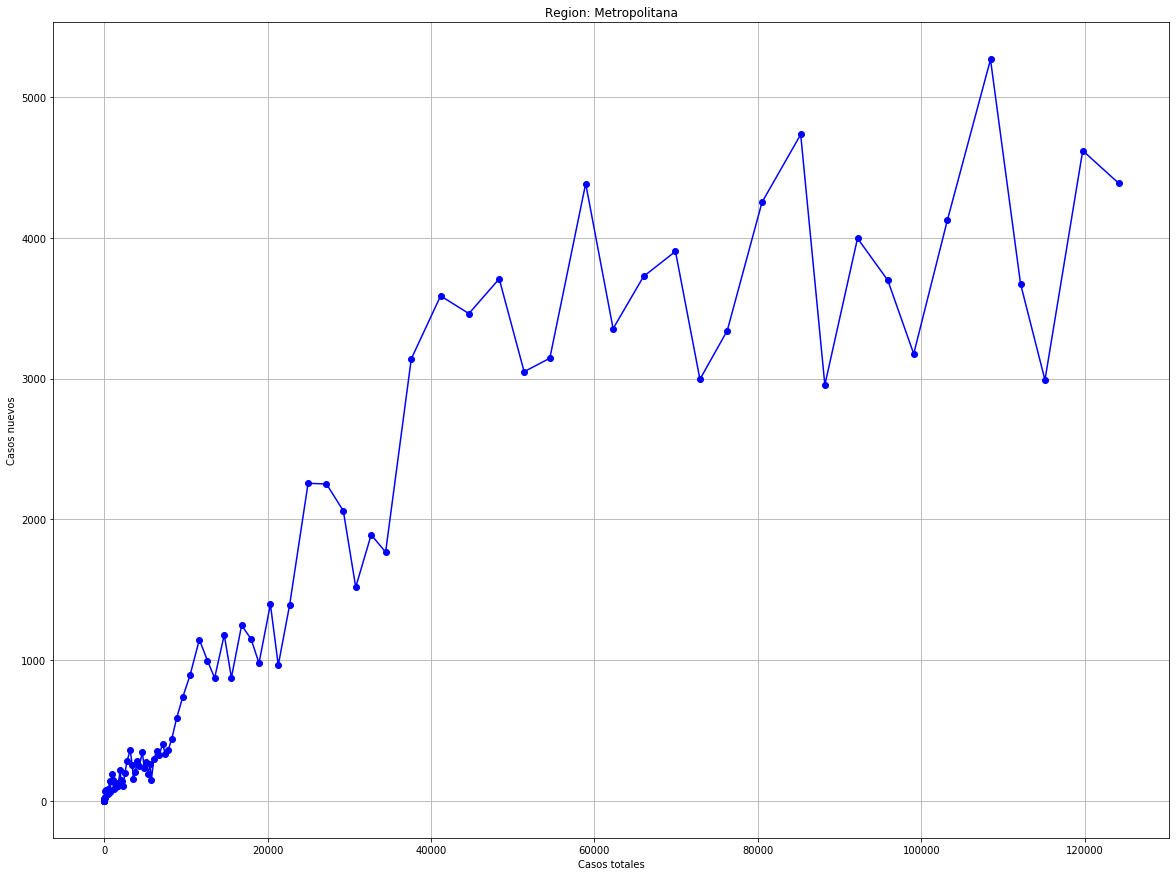

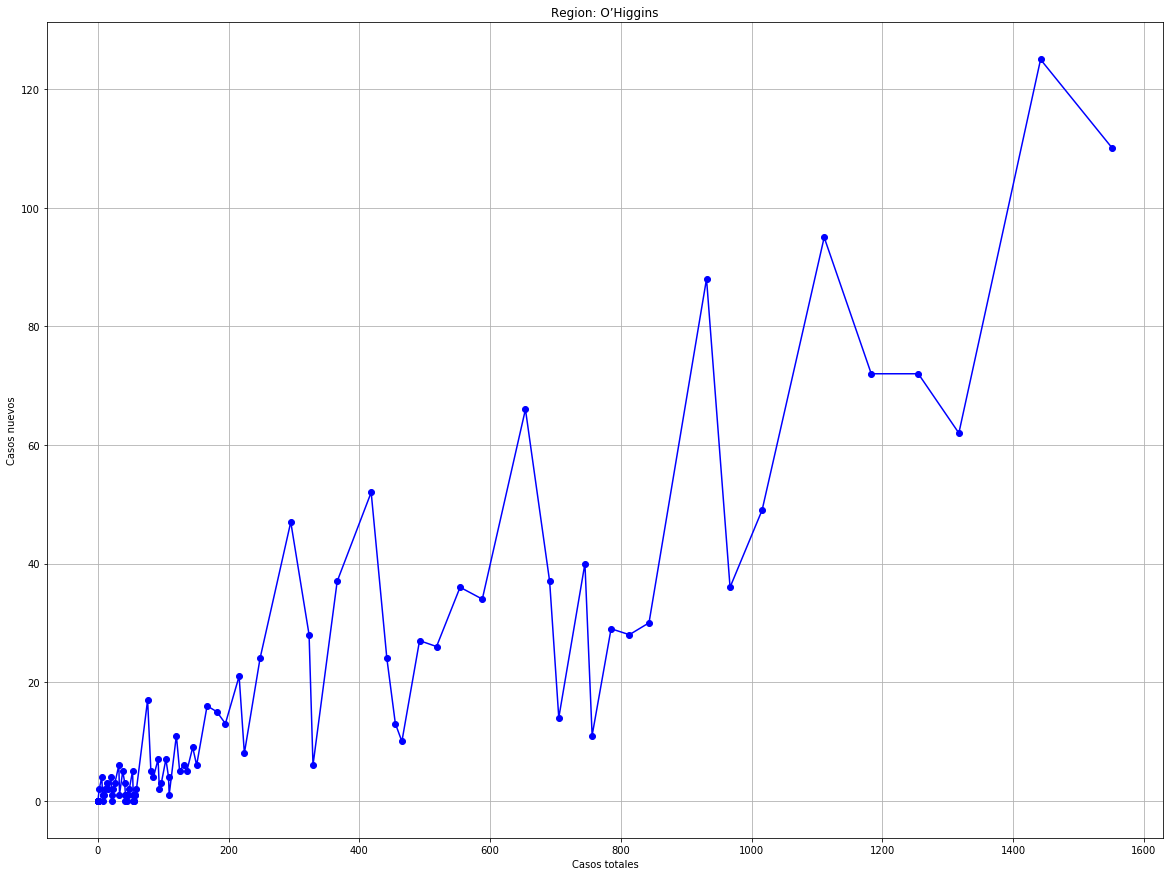

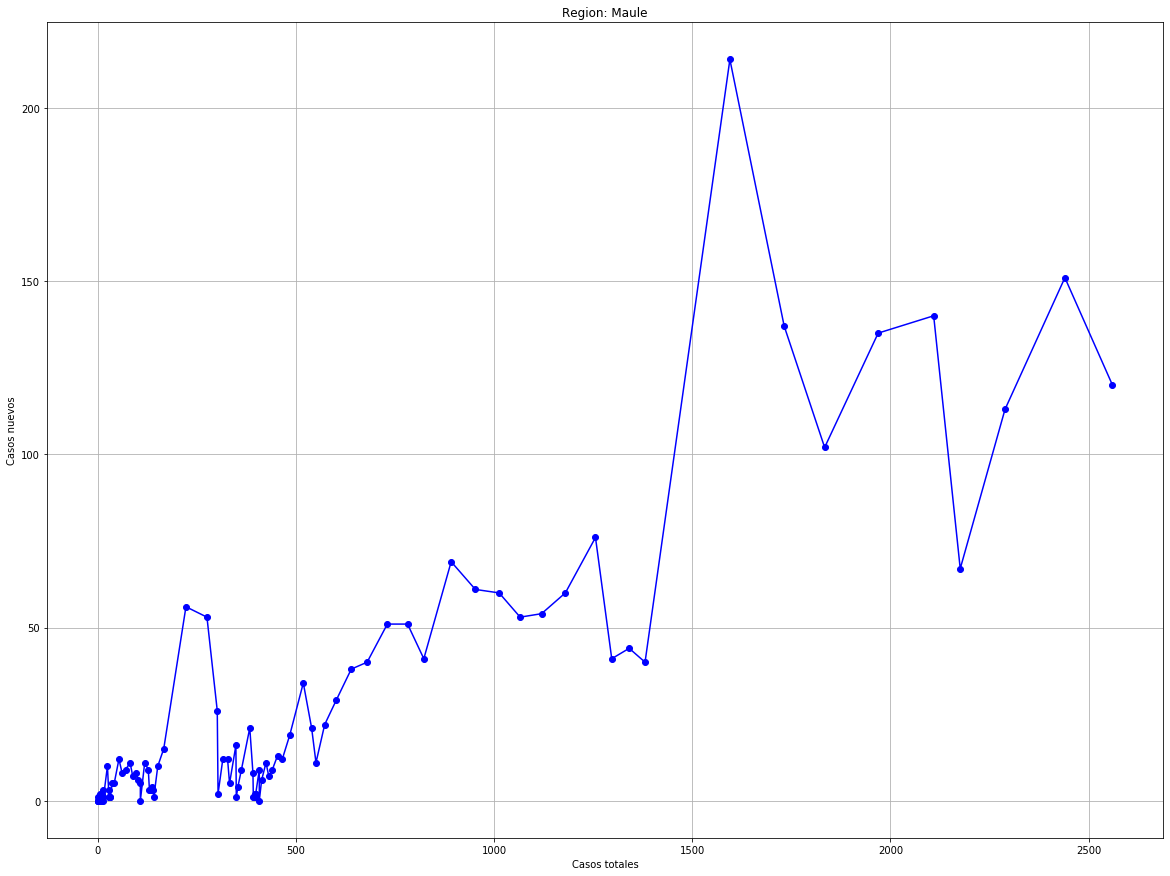

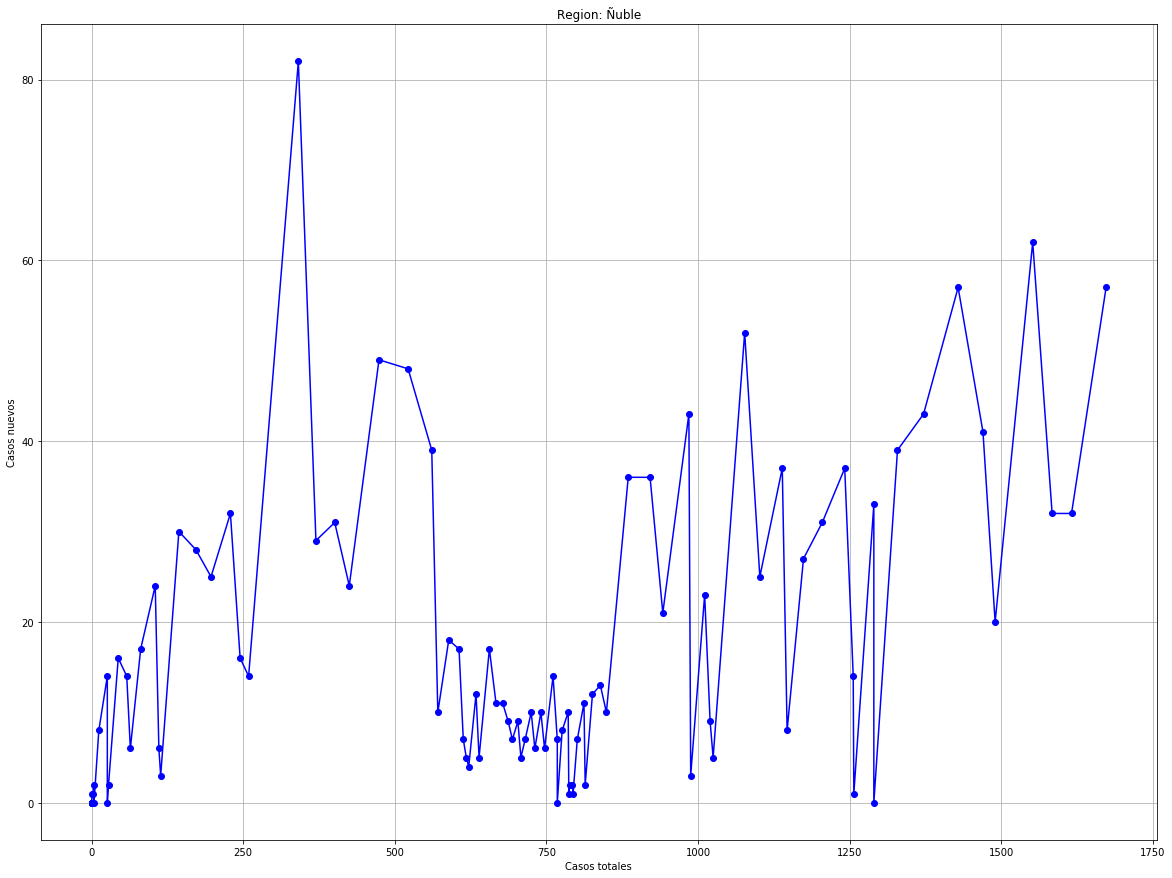

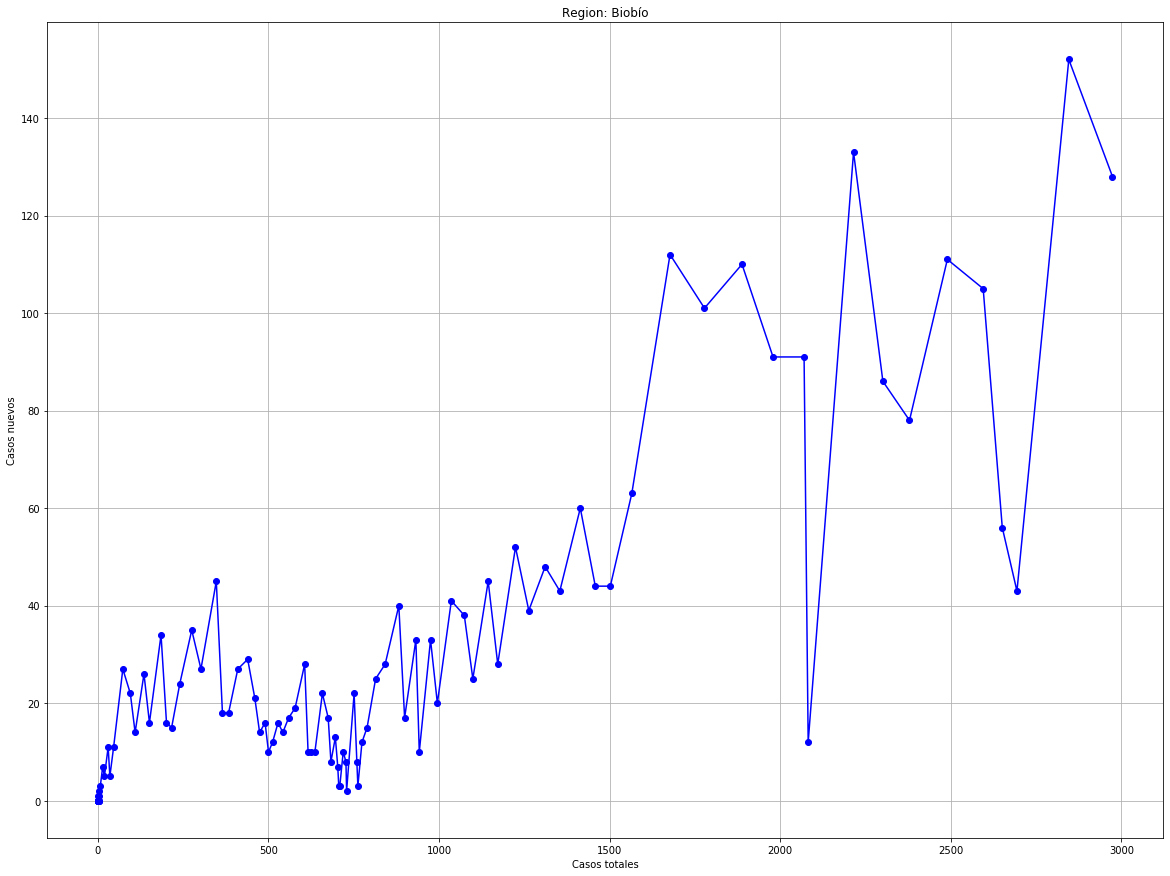

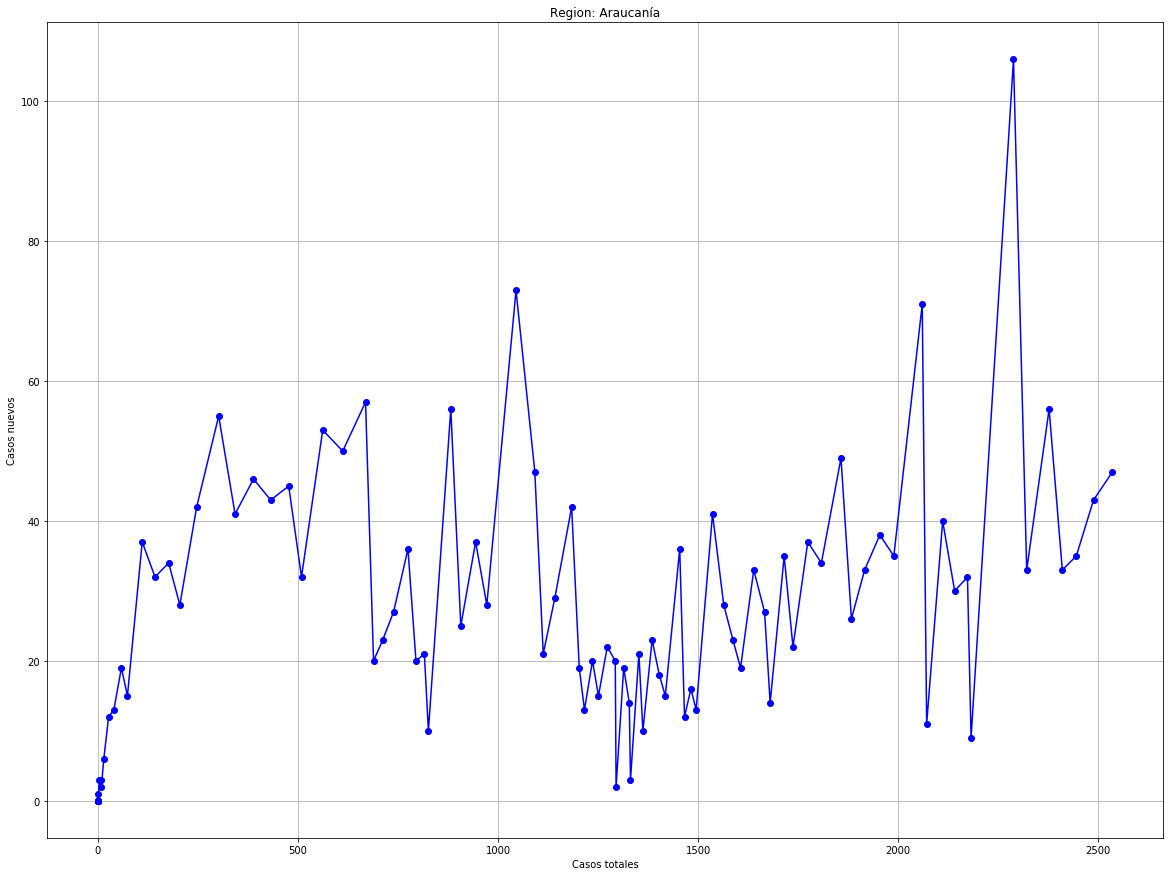

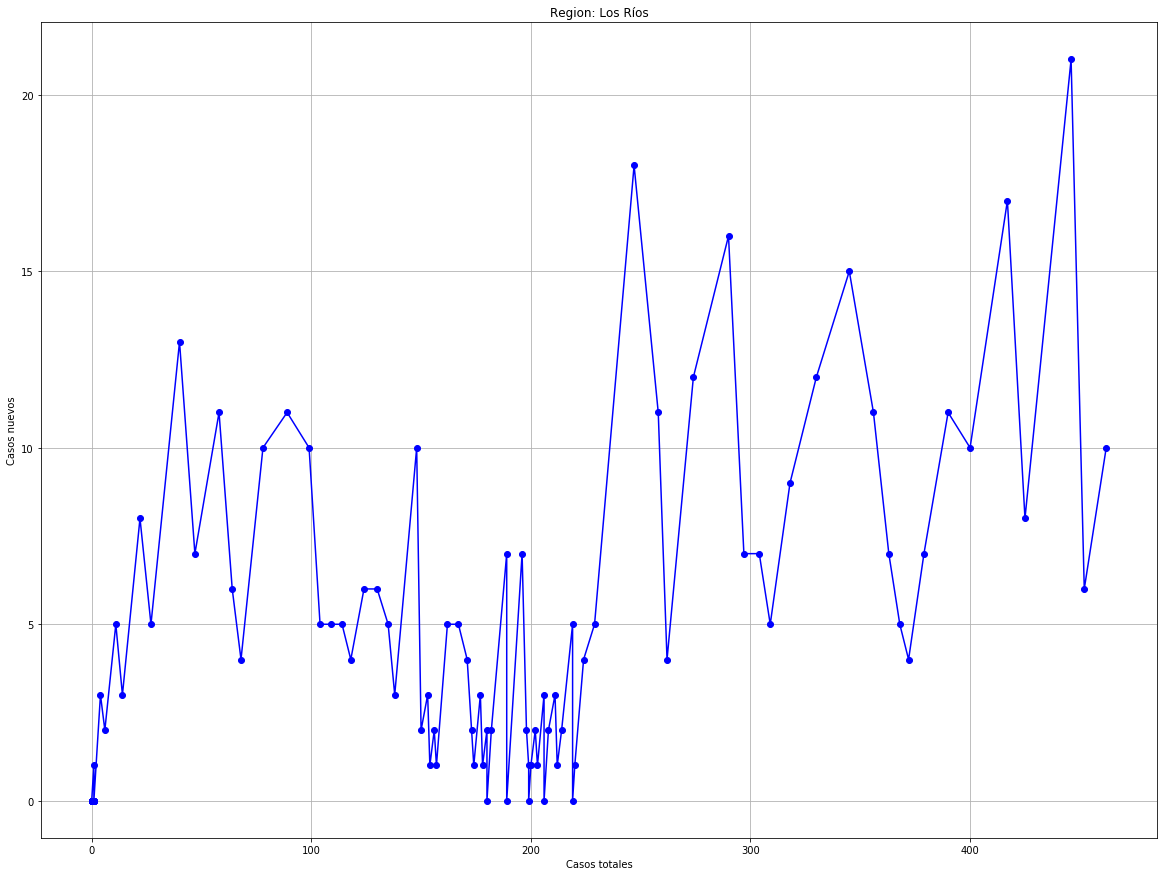

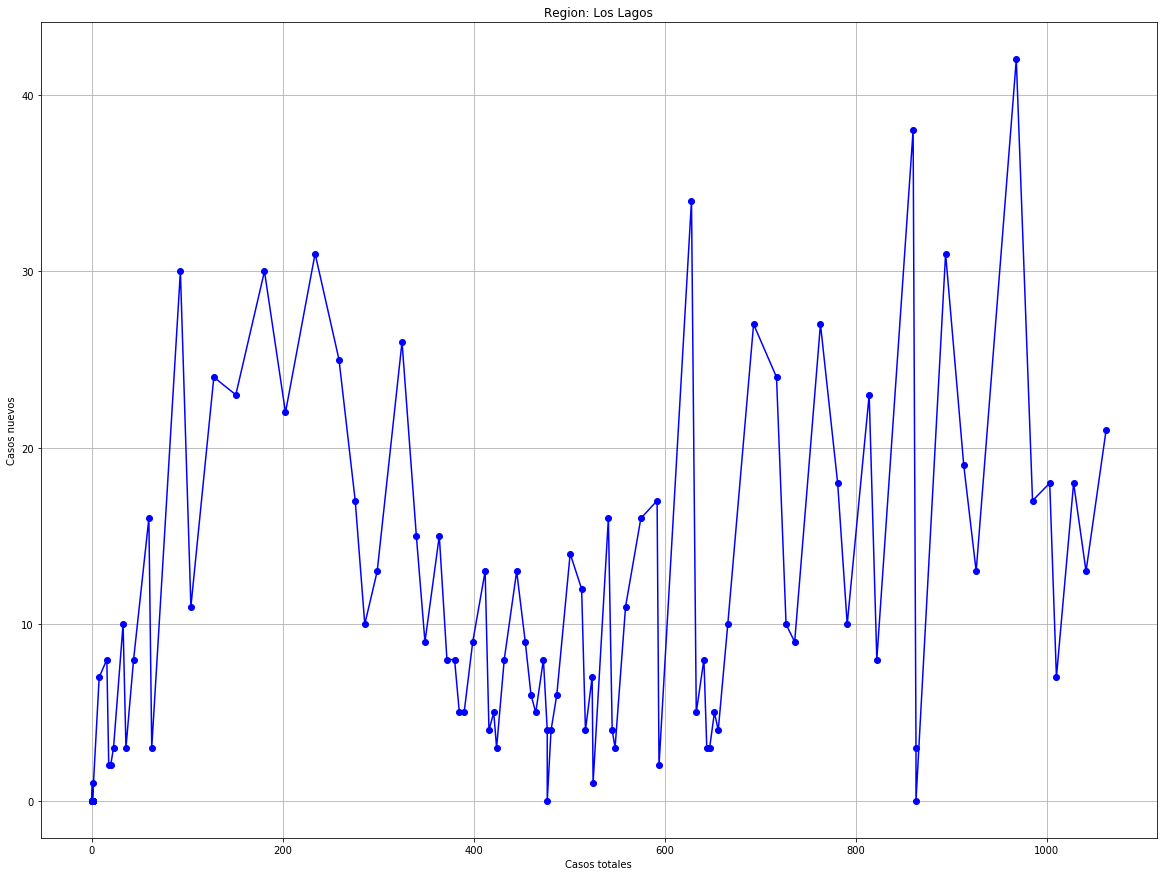

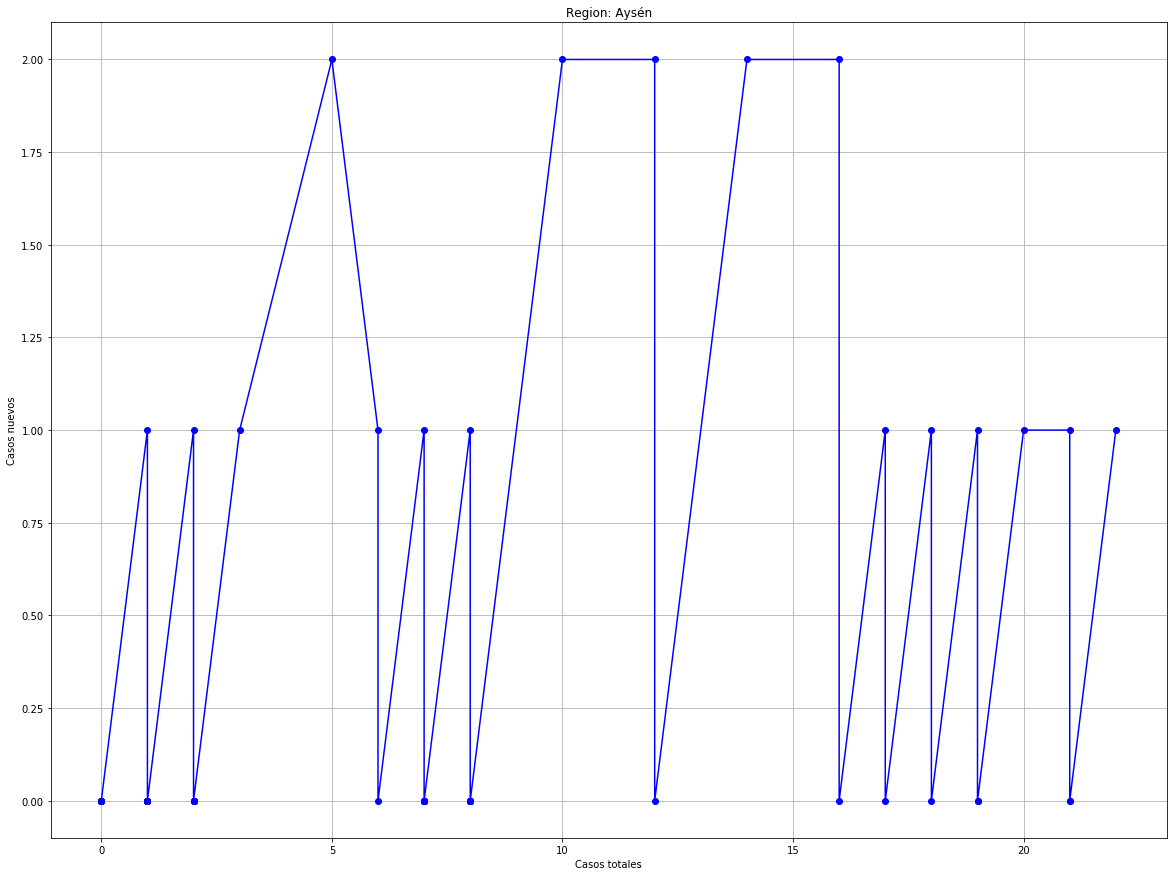

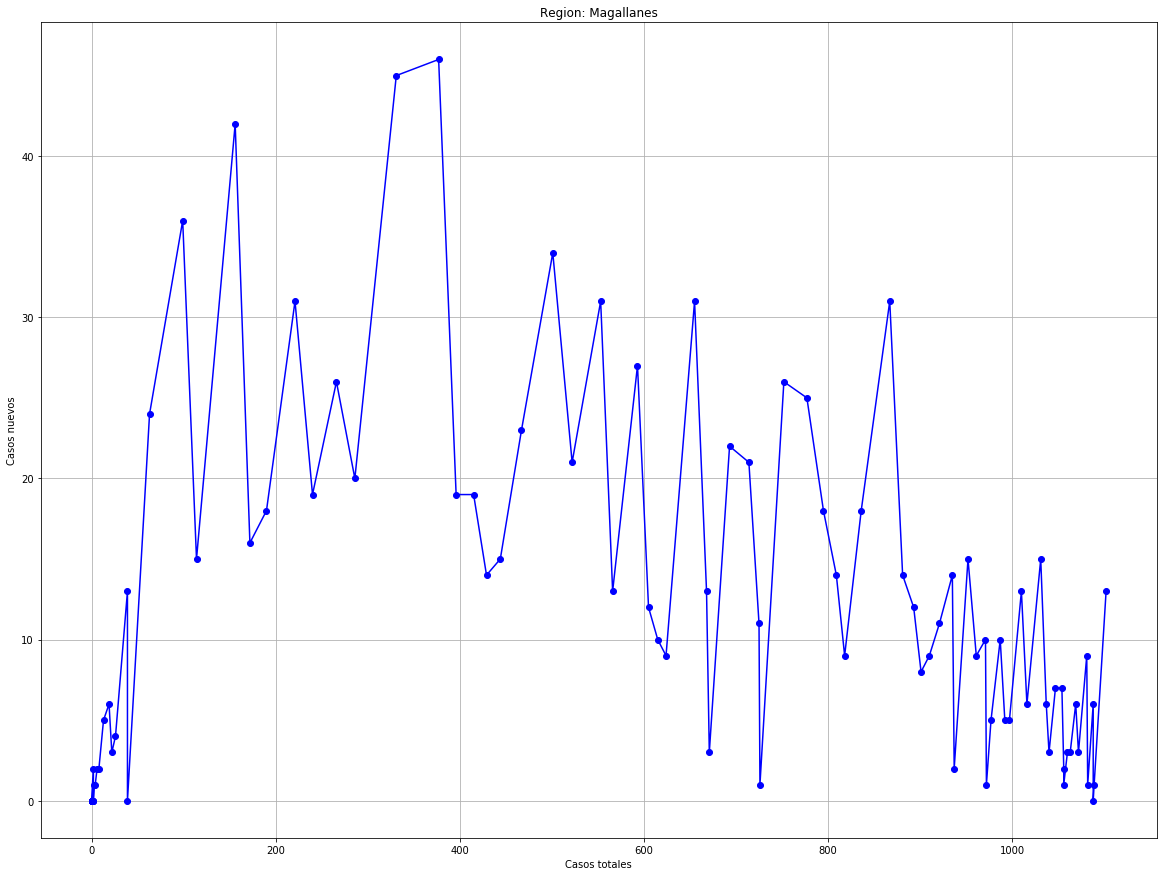

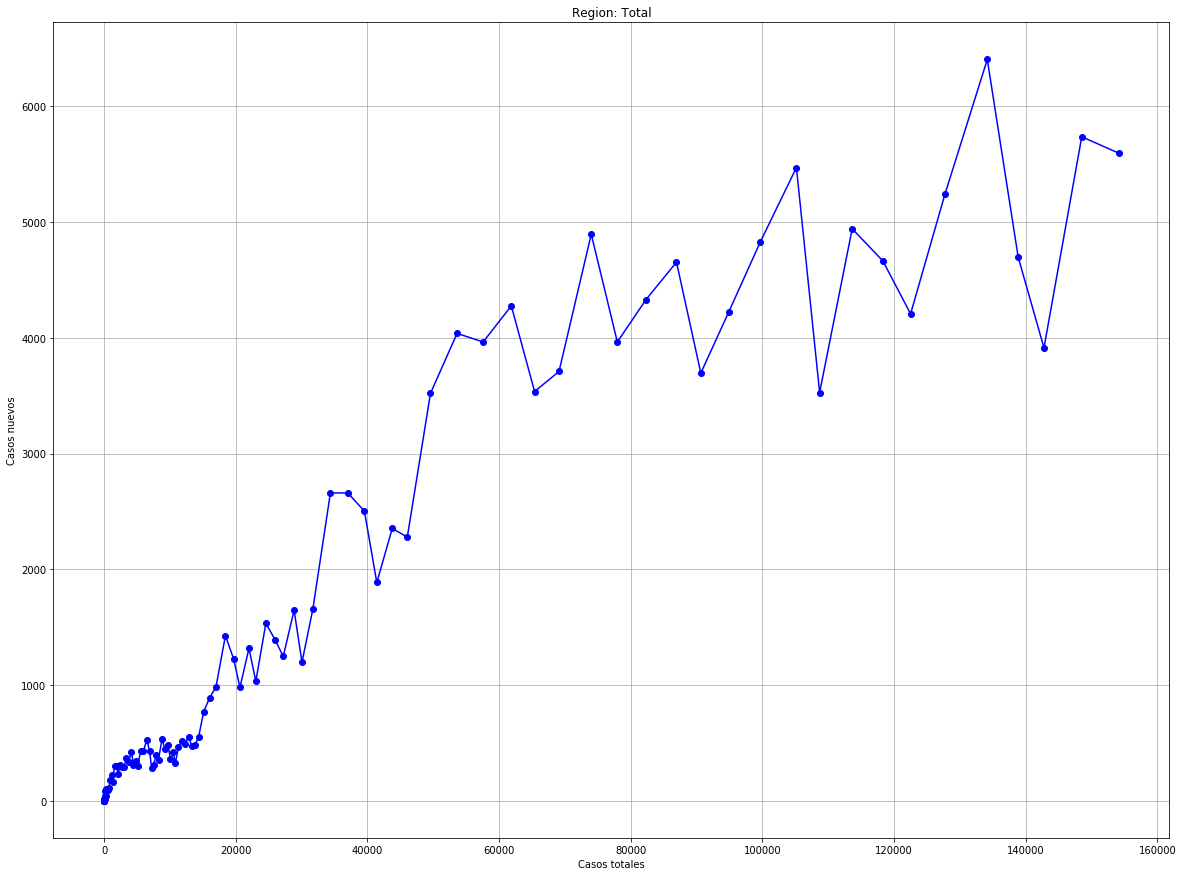

In [6]:
regiones = data_acumulados.columns[1:]
for region in regiones:
    graph(region)

In [7]:
interact(graph,
         region = regiones)
None

interactive(children=(Dropdown(description='region', options=('Arica y Parinacota', 'Tarapacá', 'Antofagasta',…

## Nuevos contagios por días

In [8]:
def labelonbars(X, Y):
    n = len(X)
    for i in range (n):
        number = '{:,}'.format(int(Y[i])).replace(',', '.')
        plt.annotate(
            number, xy=(X[i], Y[i]),
            xytext =(0, 10),
            textcoords="offset points",
            ha ='center', va='bottom',
            size = '15')
        
def graph_for_days(region):
    fechas        = data_nuevos["Fecha"].values.tolist()
    casos_nuevos  = data_nuevos[region].values.tolist()
    casos_totales = data_acumulados[region].values.tolist()
    
    plt.figure(figsize=(20,15))
    plt.plot(fechas, casos_nuevos, 'bo-')
    plt.title("Region: " + region)
    plt.grid()
    plt.xlabel('Fecha')
    plt.ylabel('Casos nuevos')
    labelonbars(fechas, casos_nuevos)
    #plt.xscale('log')
    #plt.yscale('log')
    plt.xticks(fechas, rotation='vertical')
    plt.show()

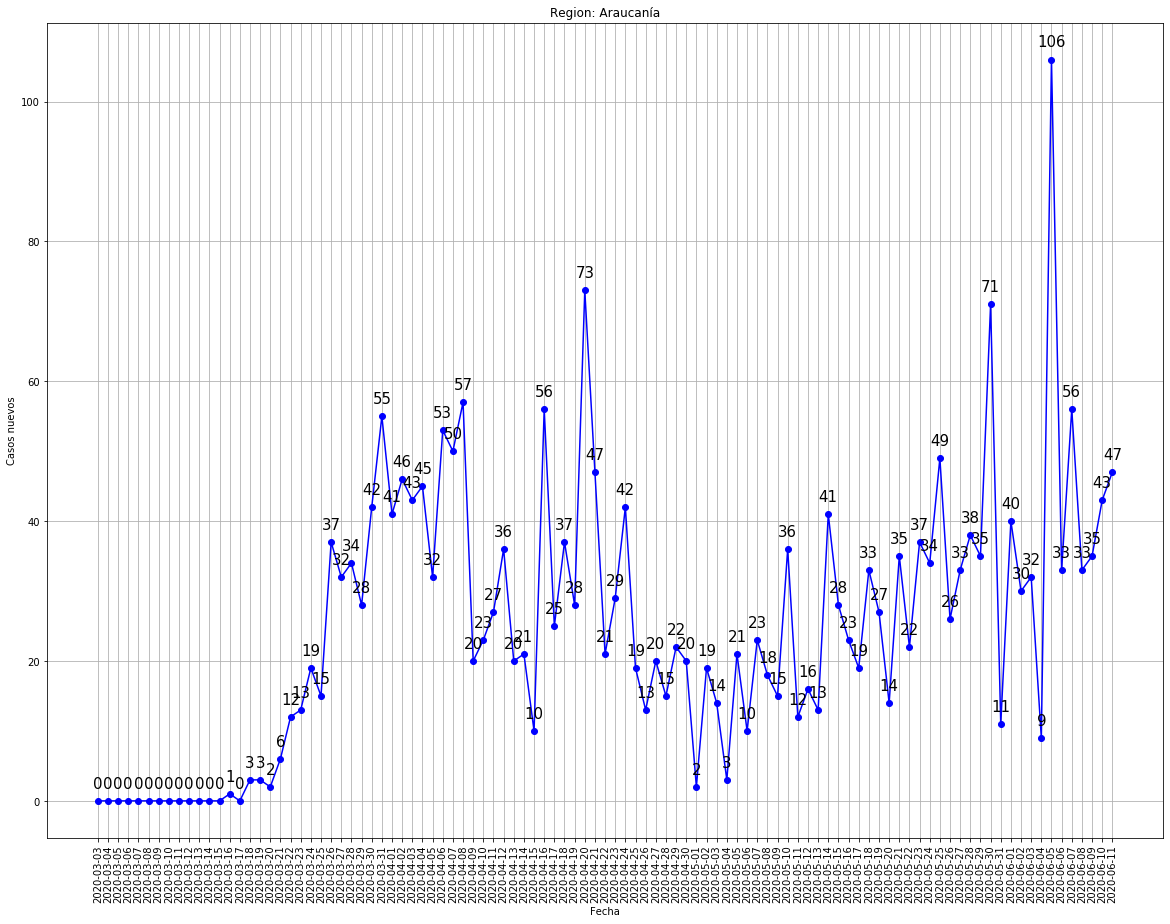

In [9]:
graph_for_days("Araucanía")

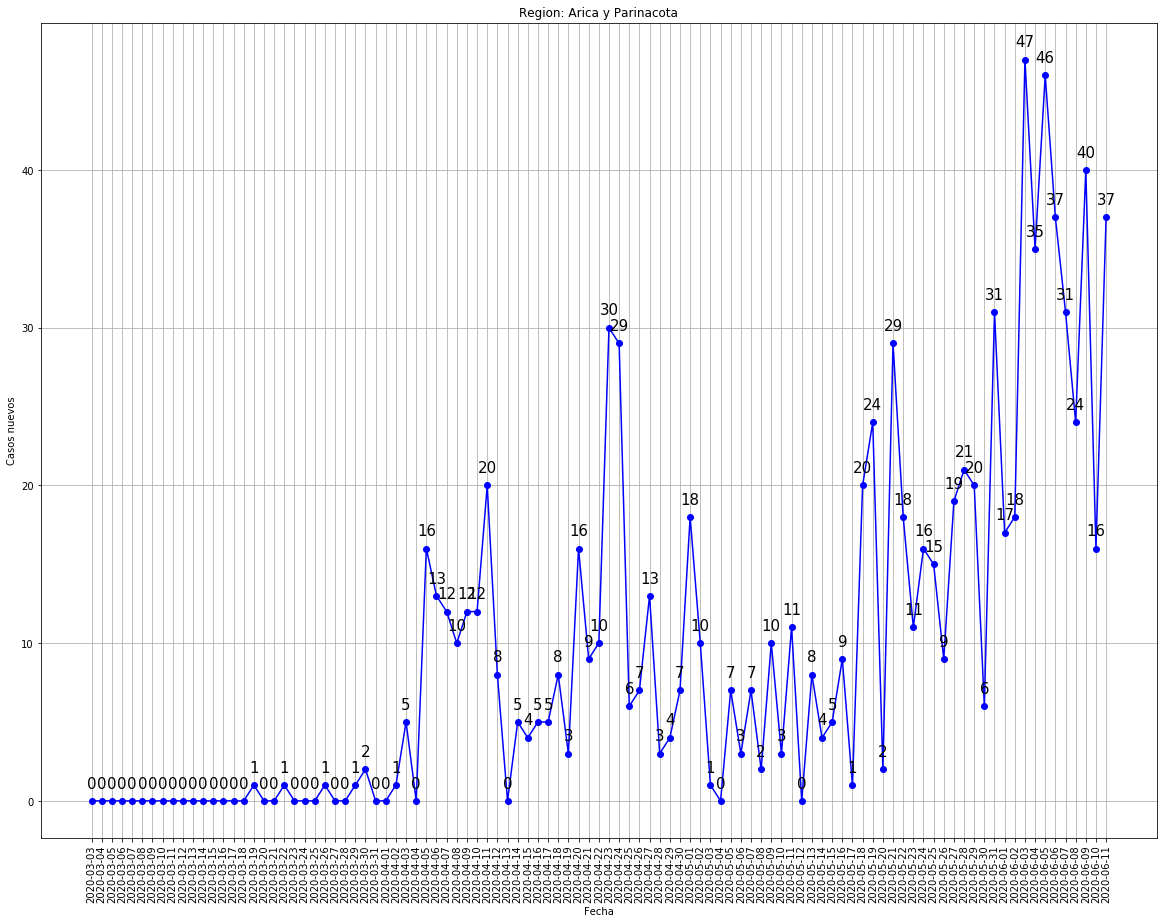

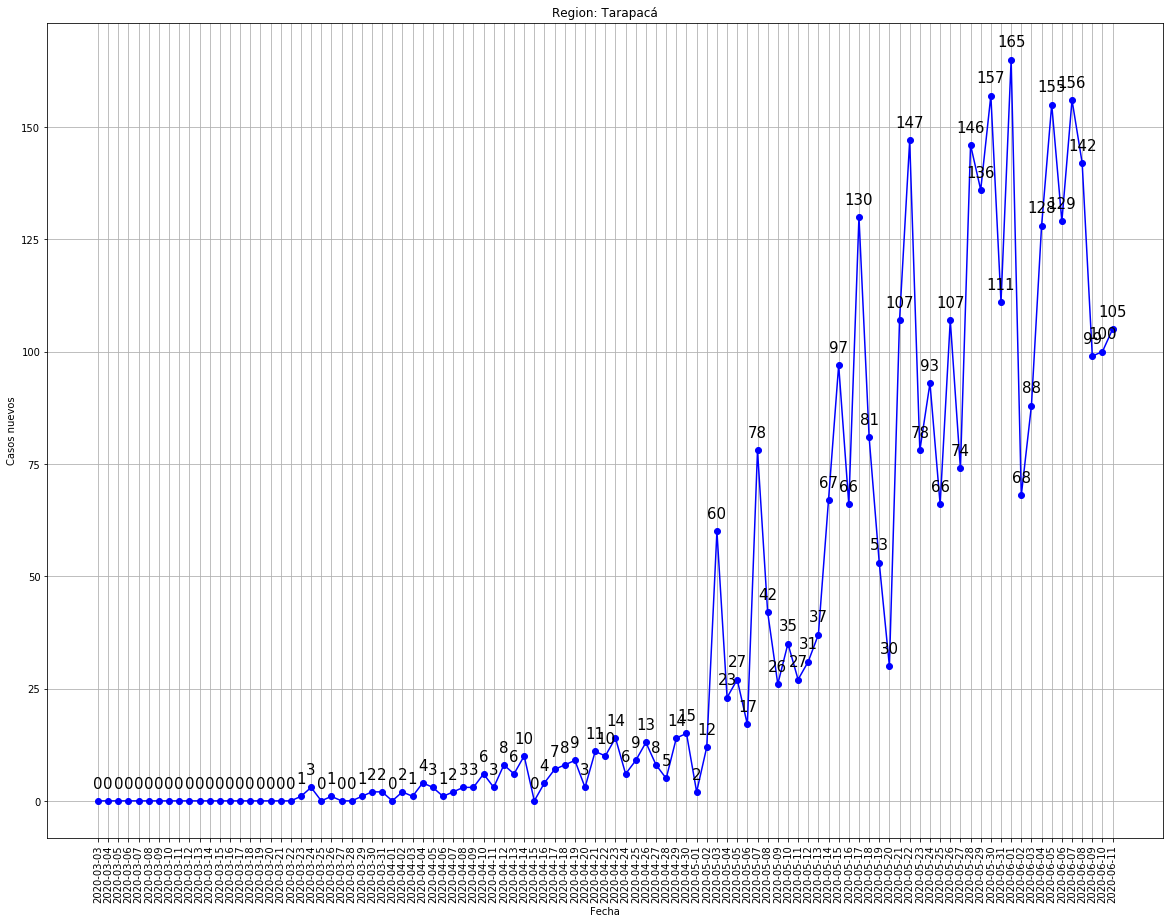

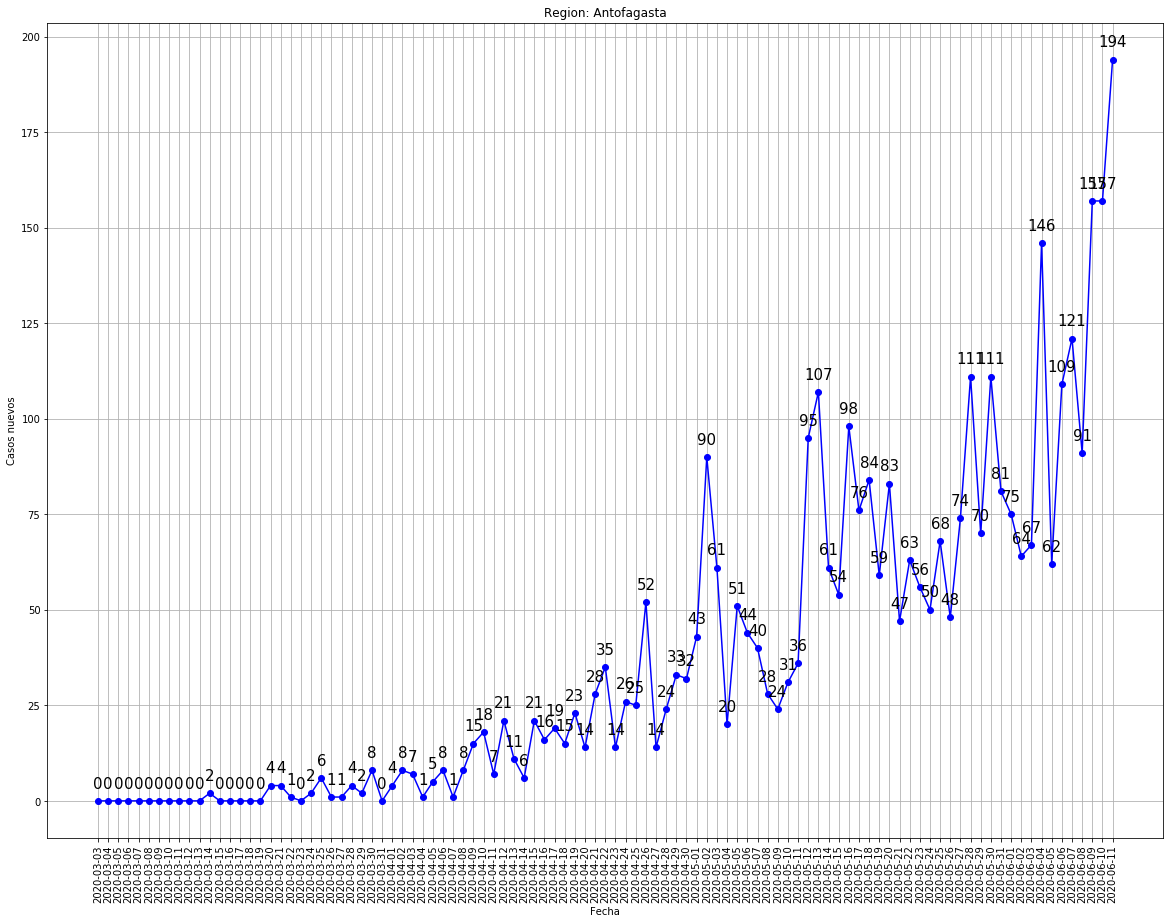

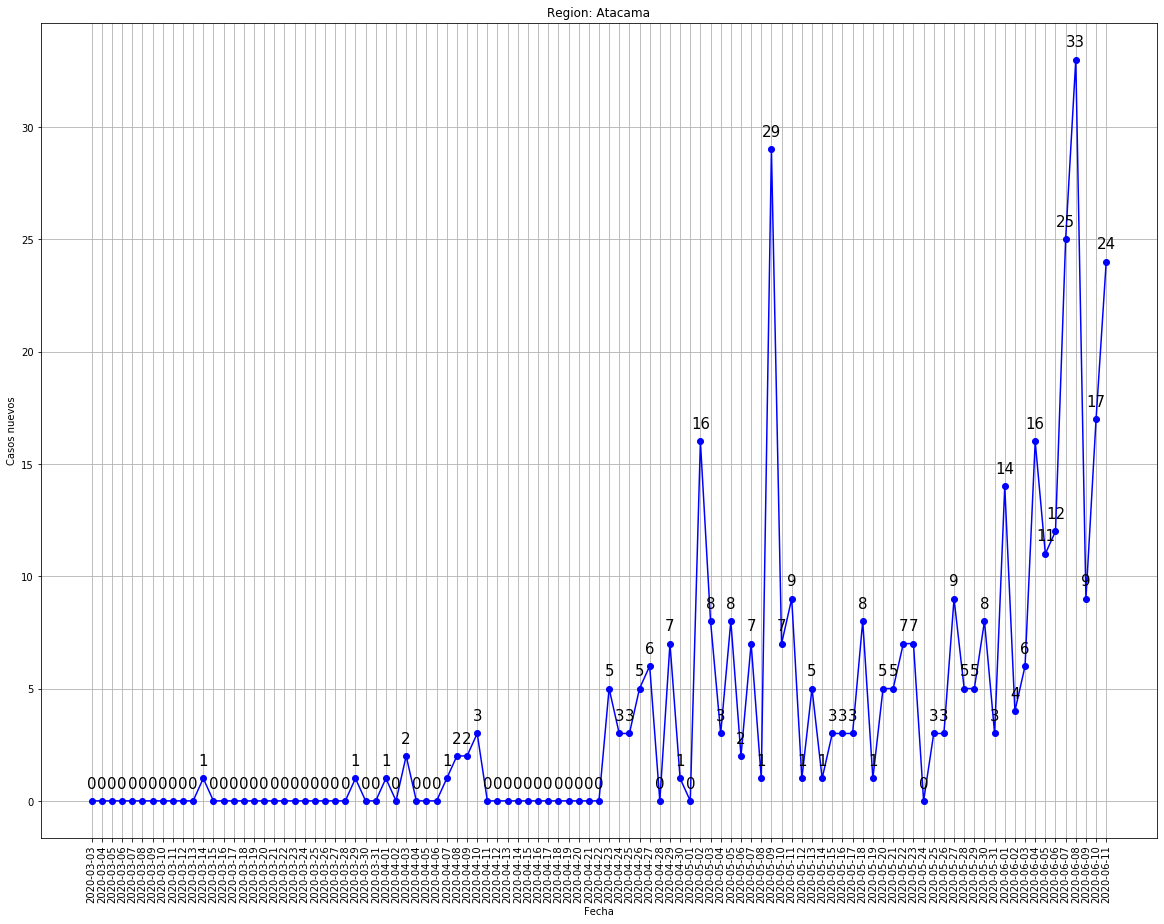

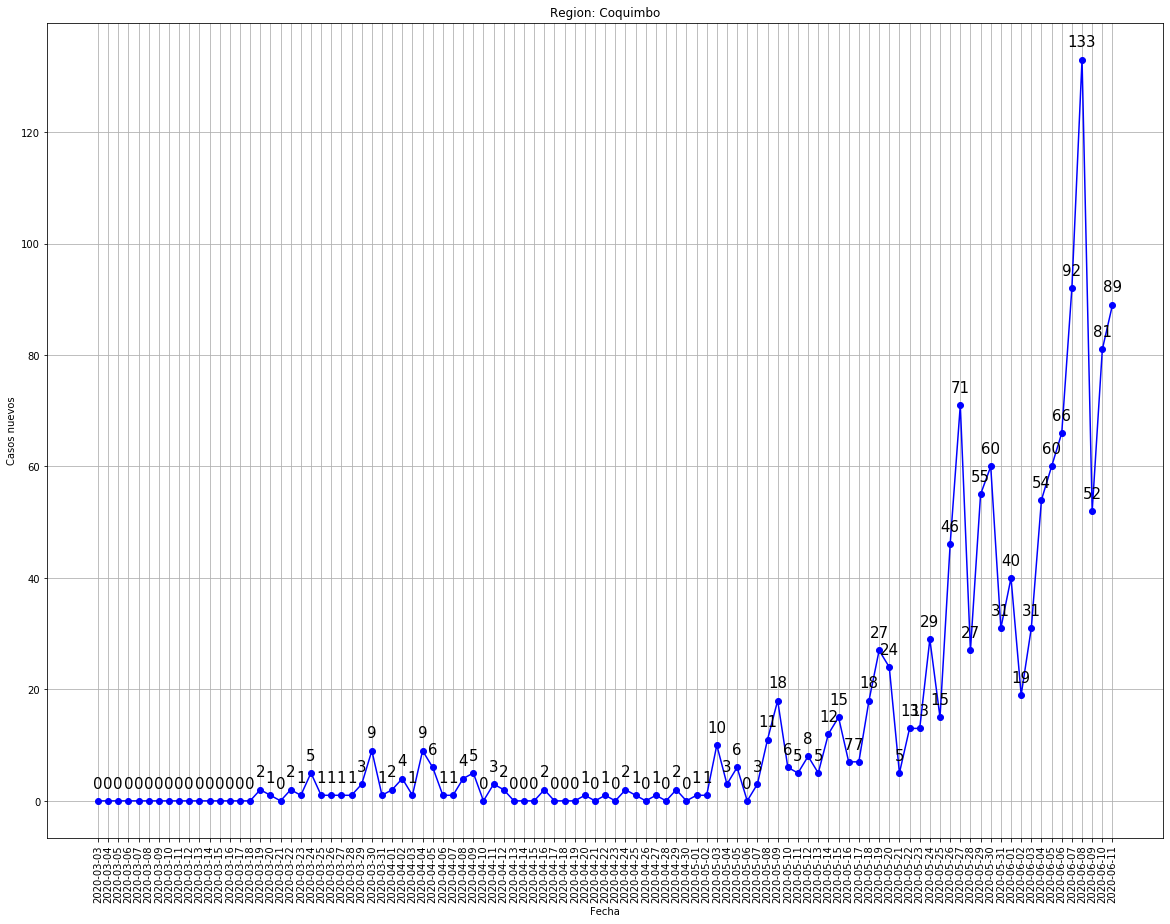

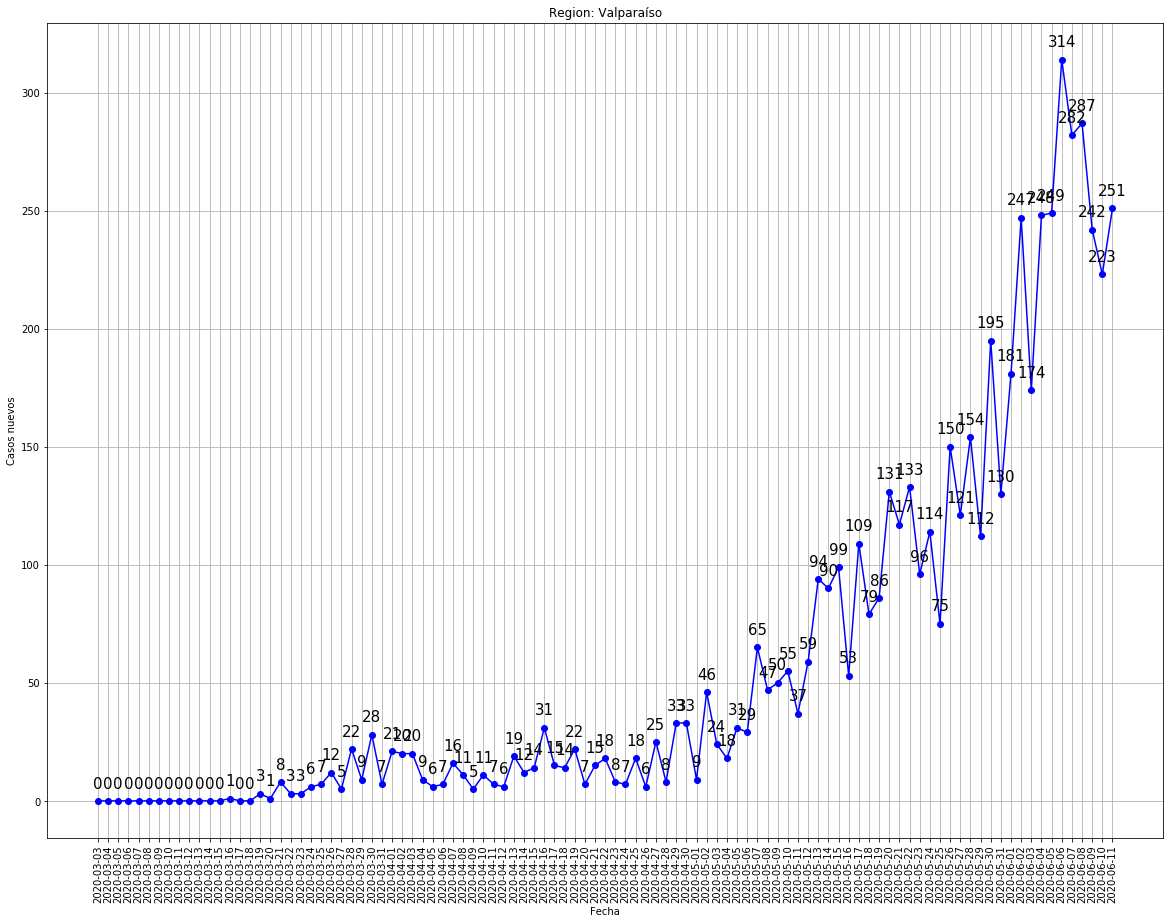

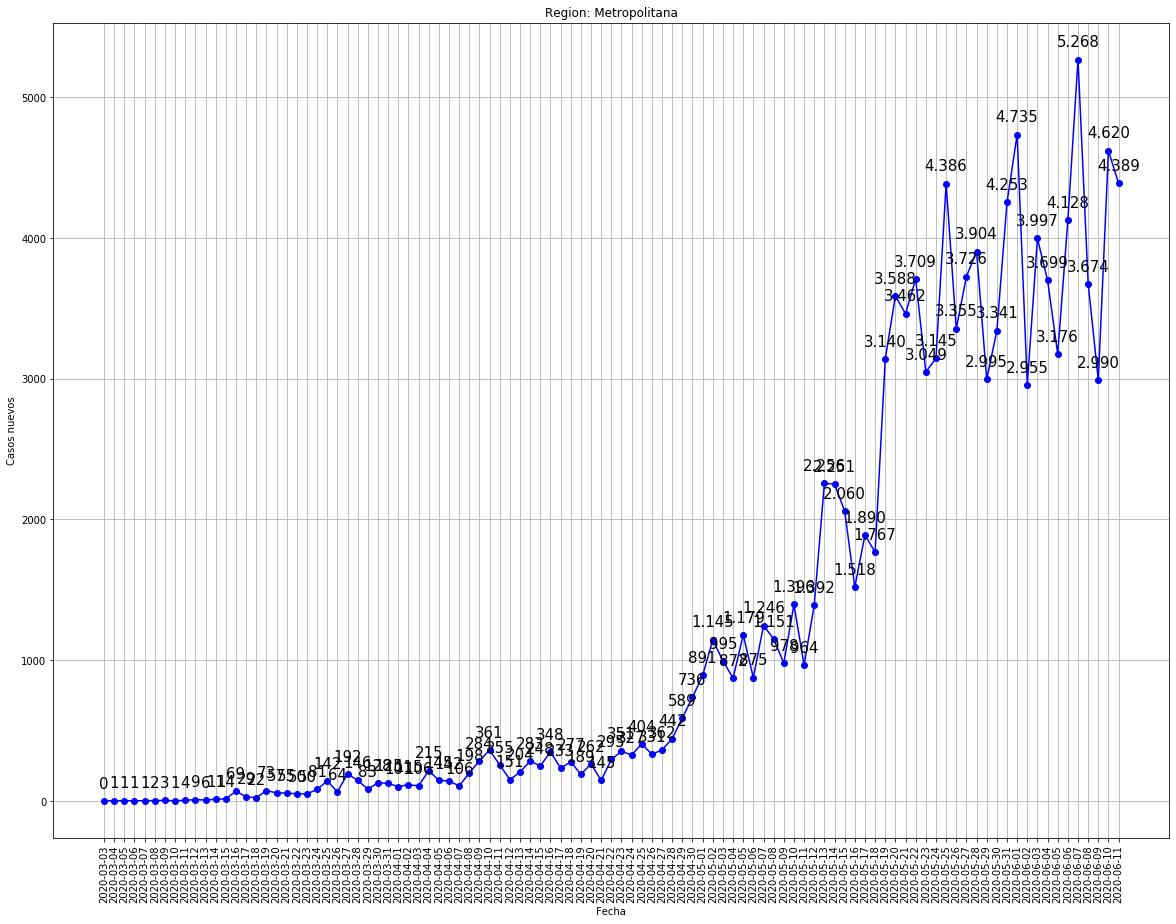

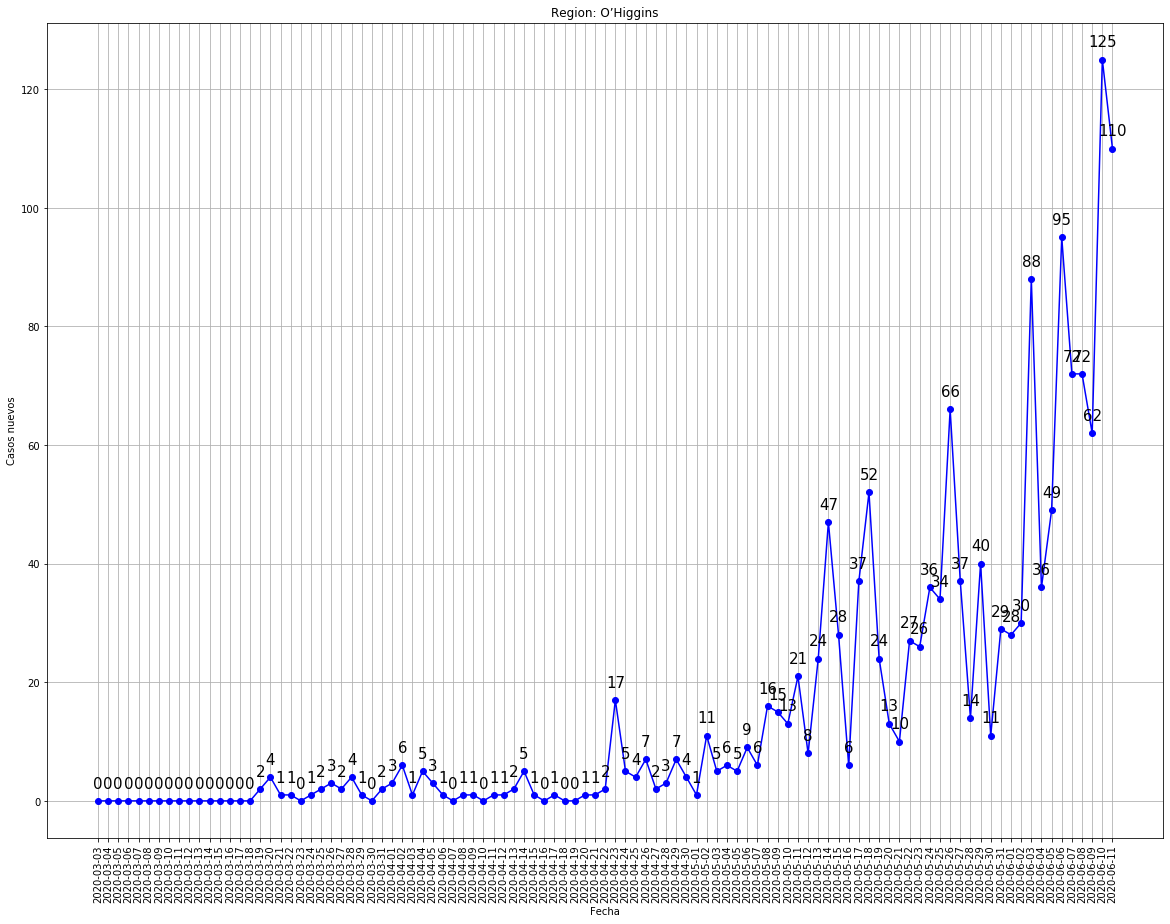

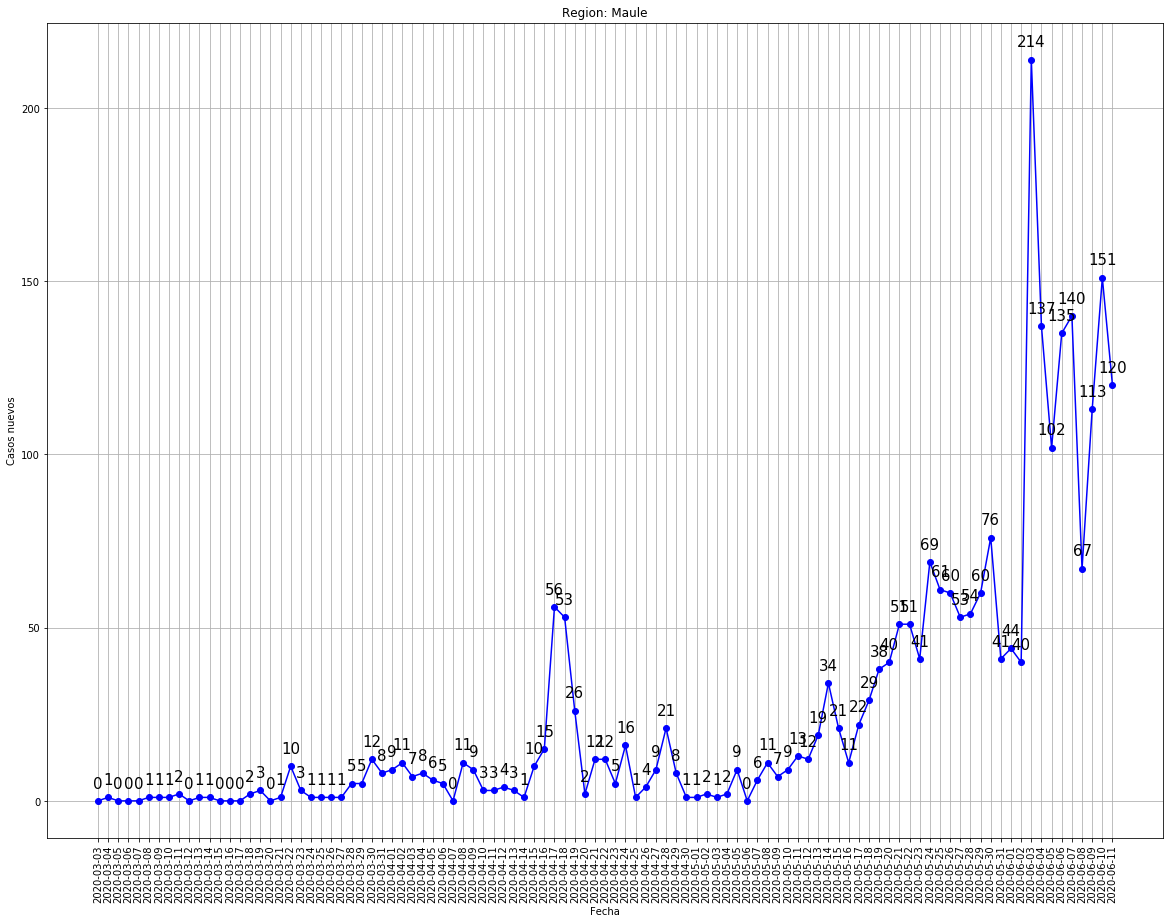

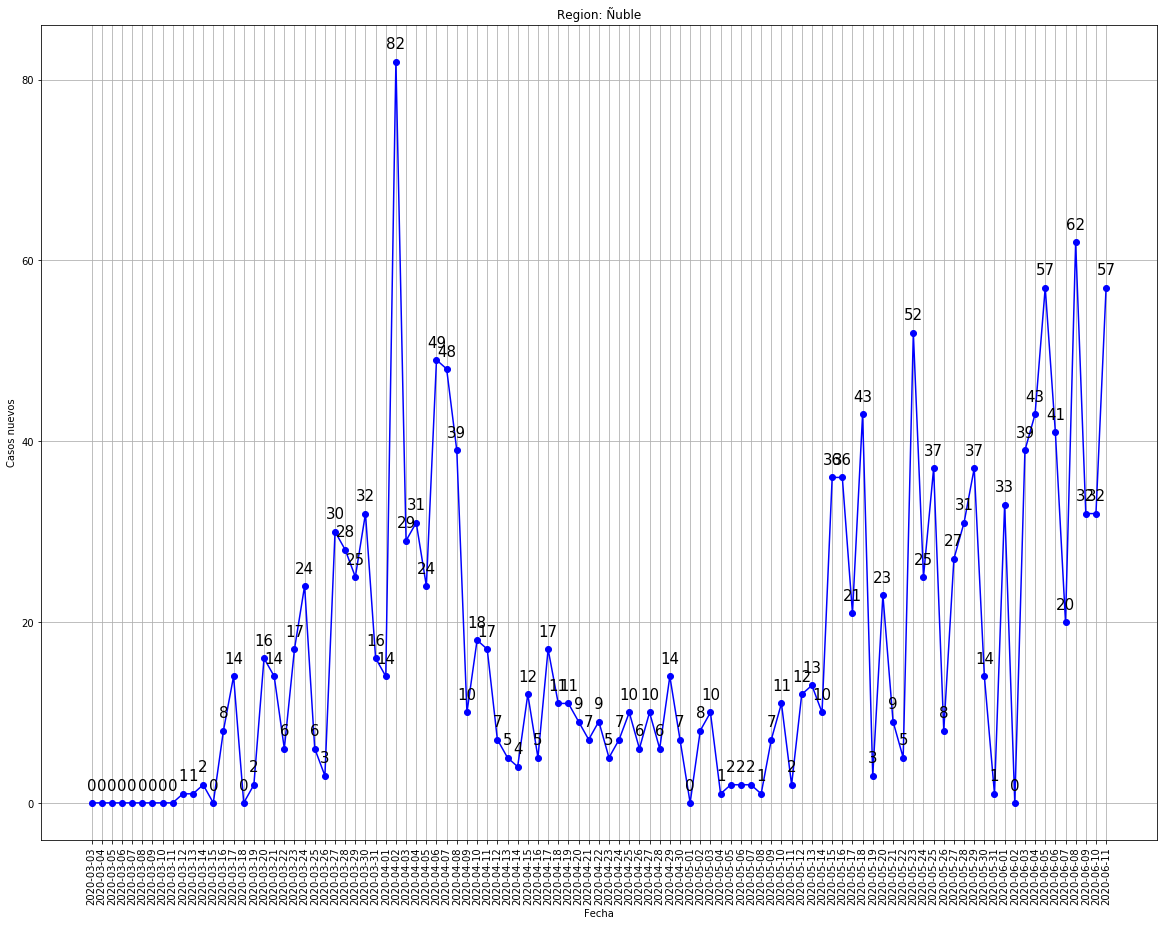

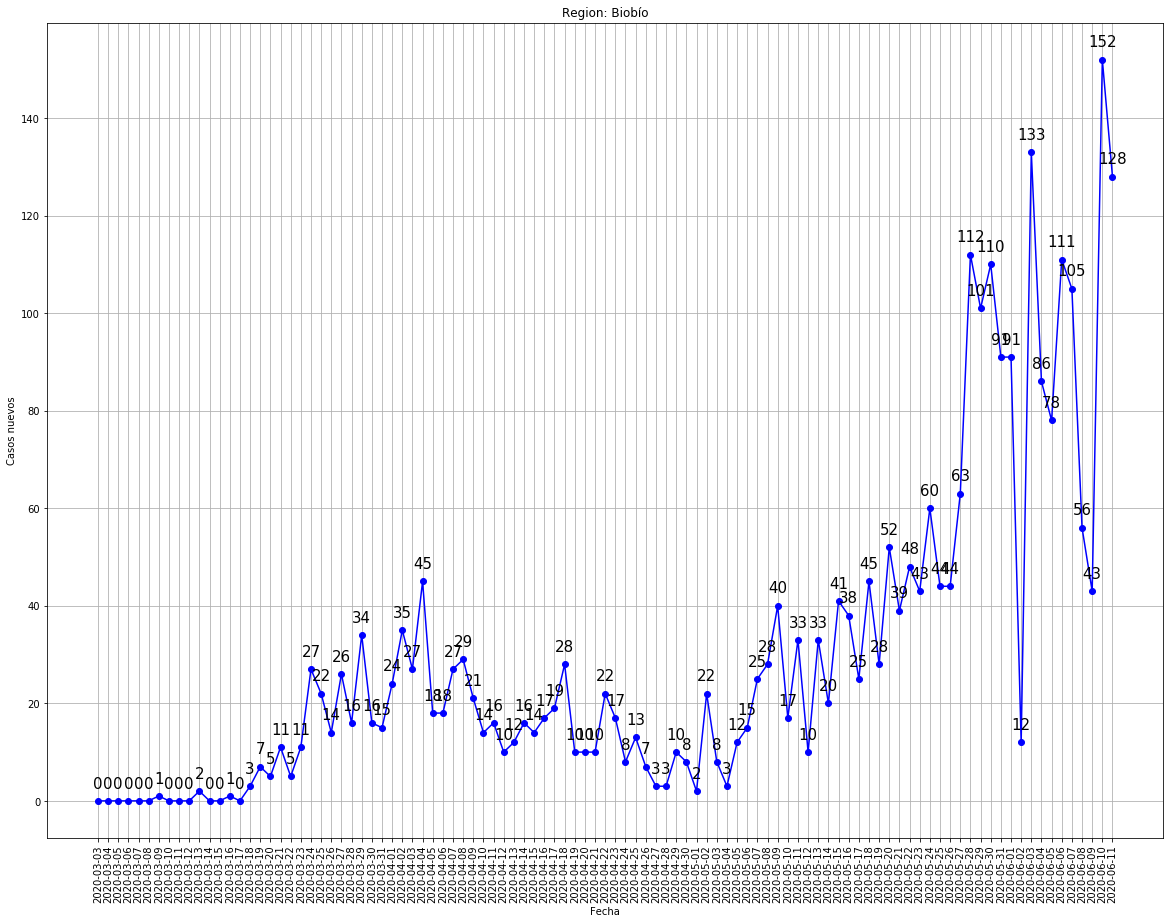

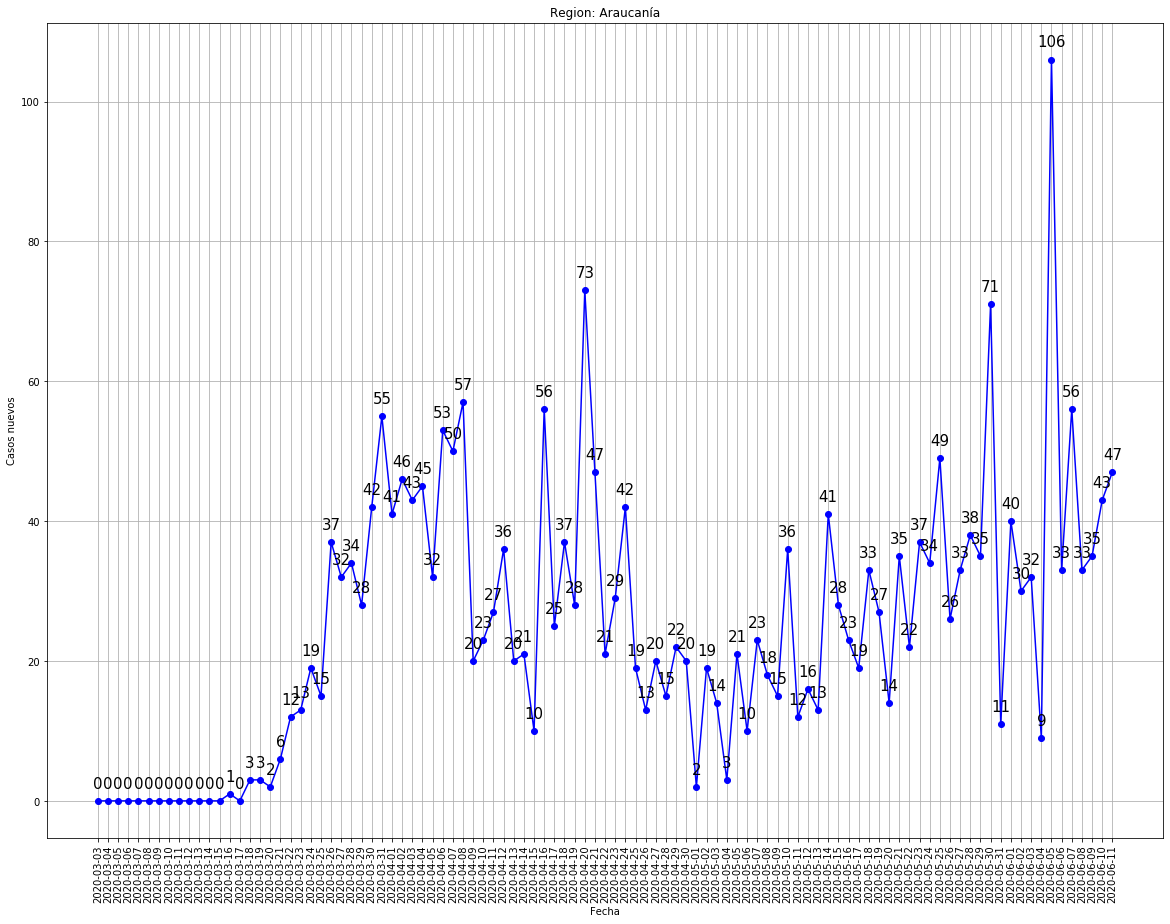

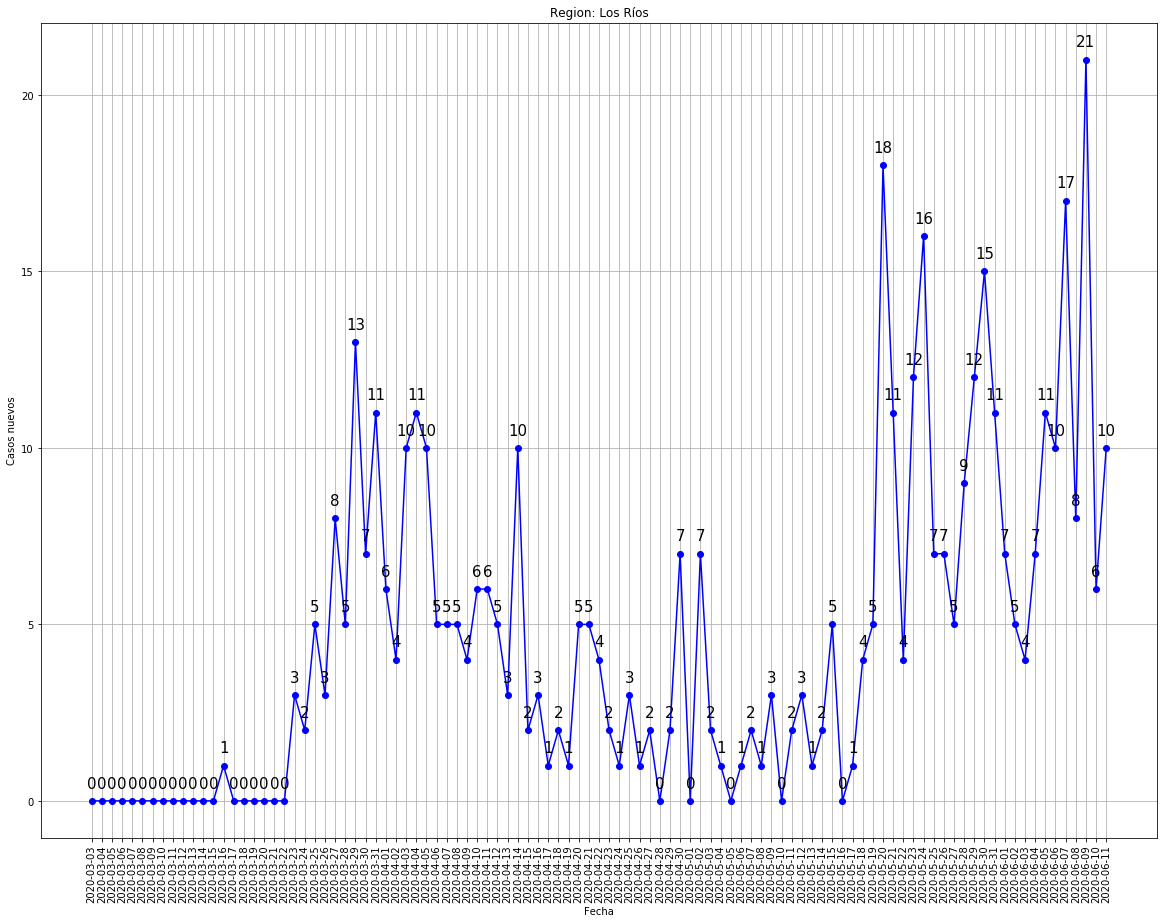

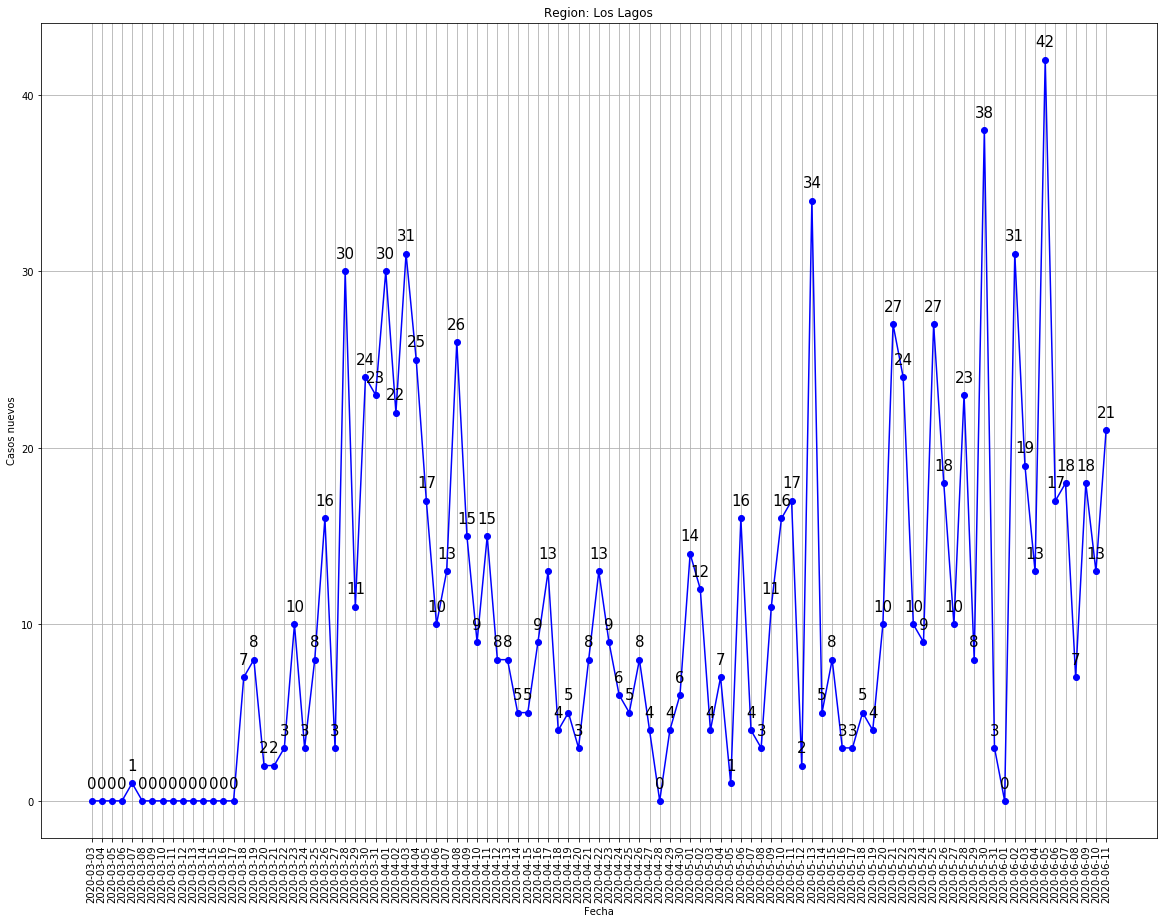

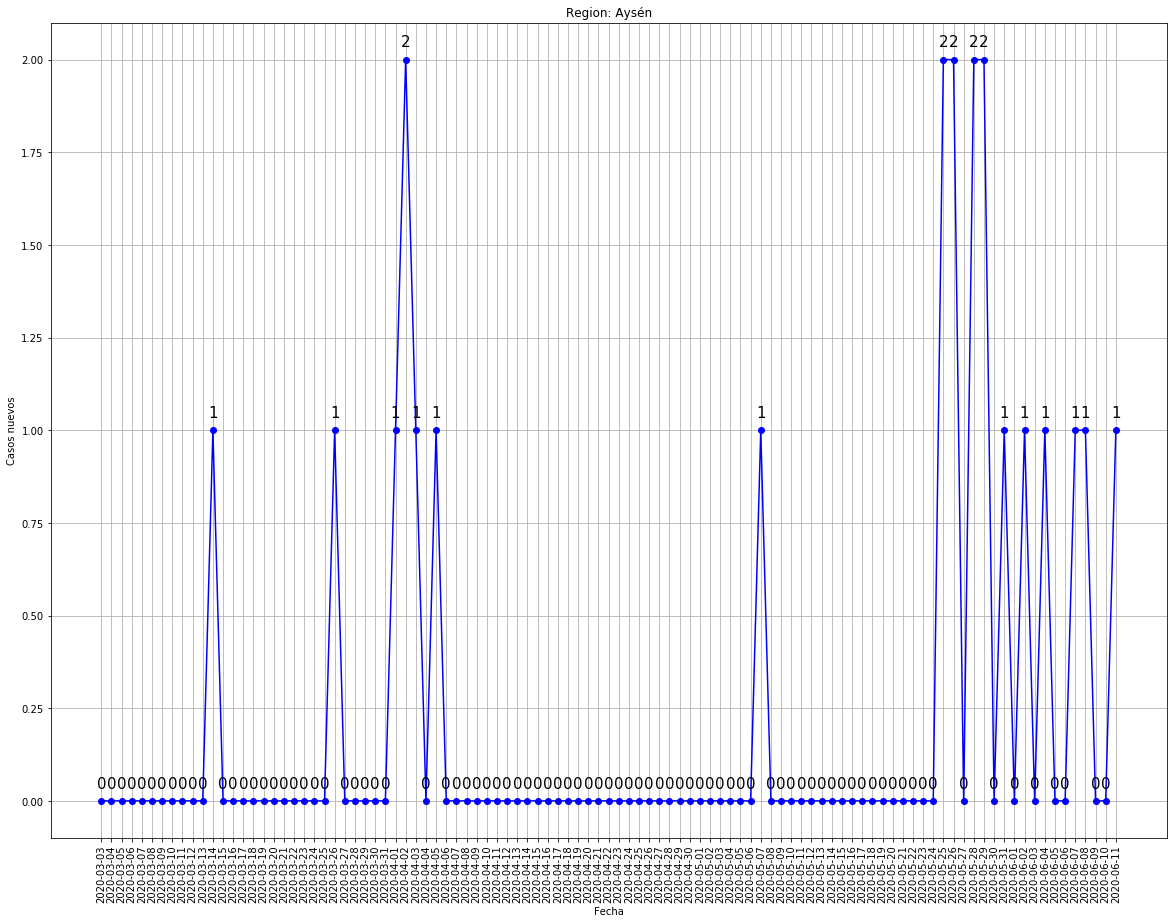

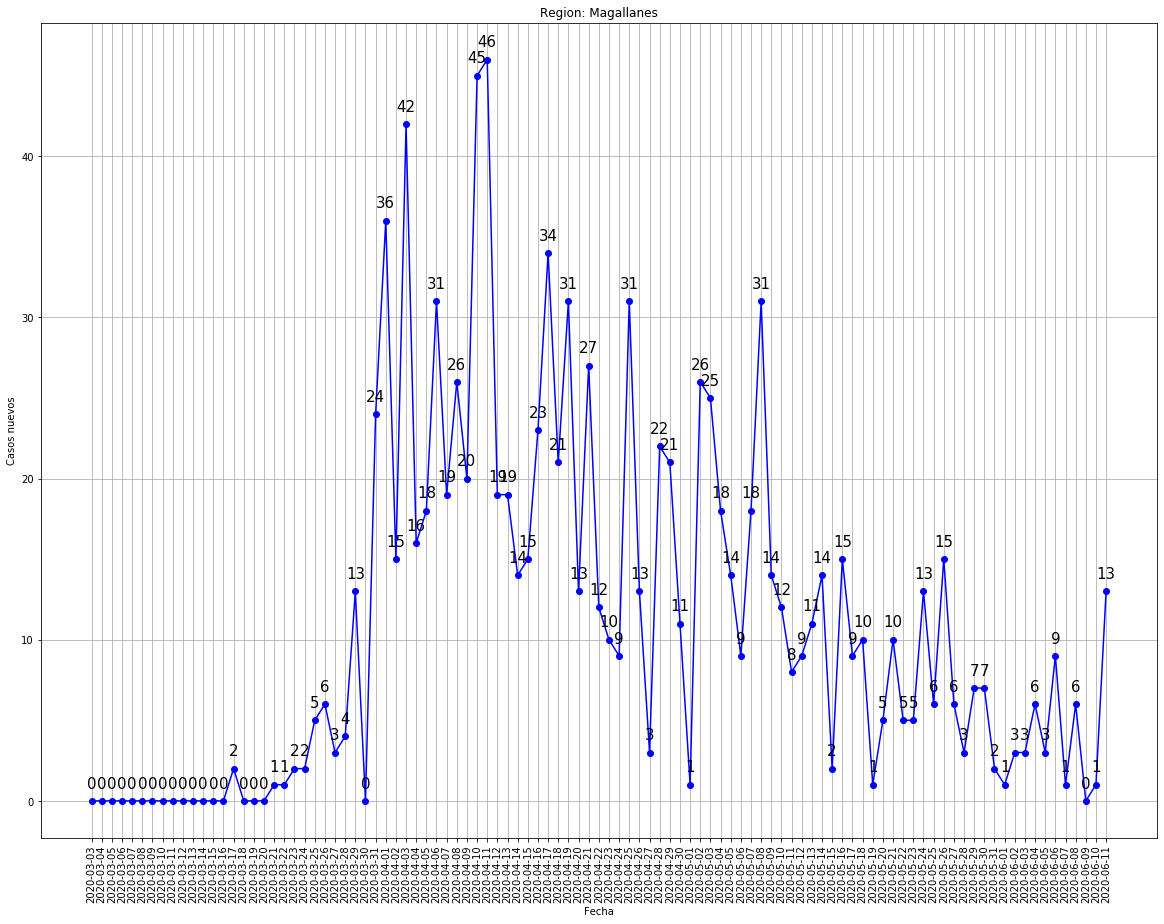

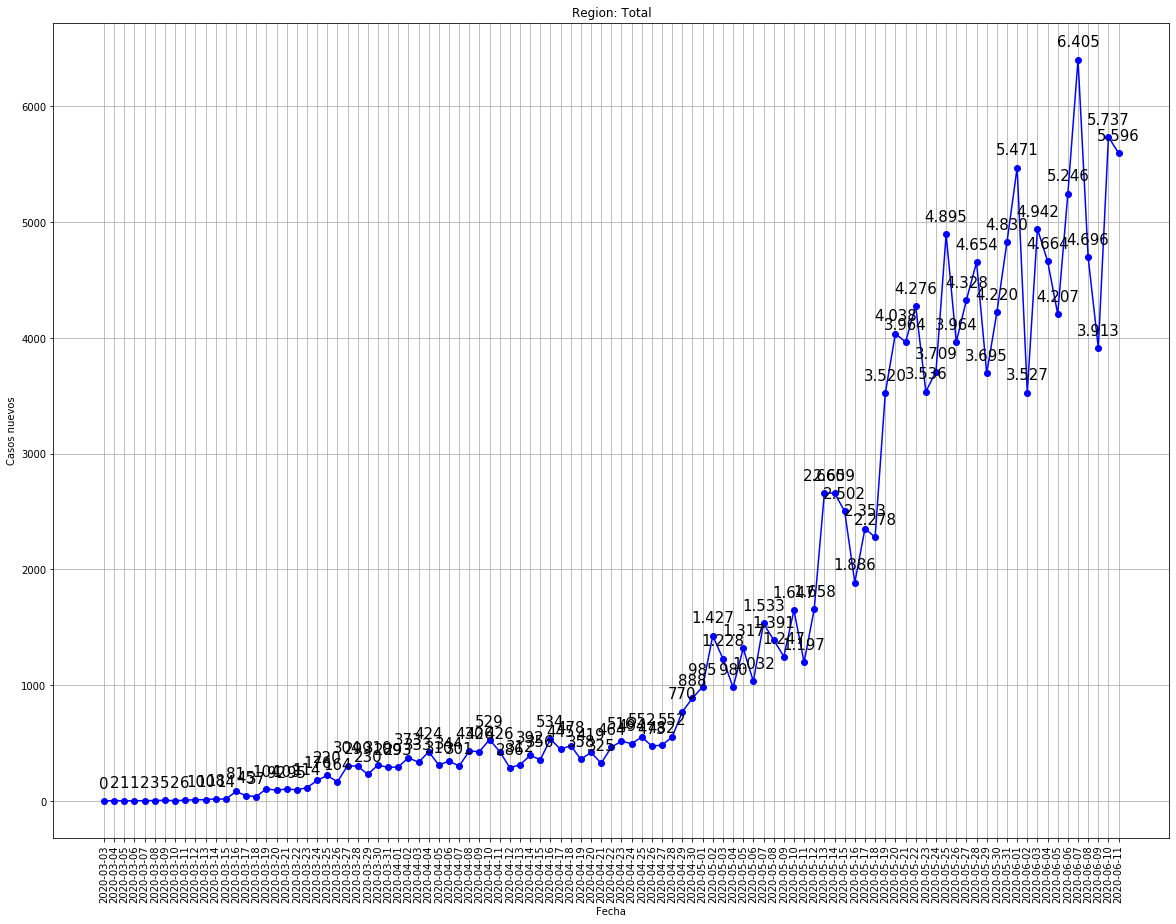

In [10]:
regiones = data_acumulados.columns[1:]
for region in regiones:
    graph_for_days(region)

In [11]:
interact(graph_for_days,
         region = regiones)
None

interactive(children=(Dropdown(description='region', options=('Arica y Parinacota', 'Tarapacá', 'Antofagasta',…